<a href="https://colab.research.google.com/github/ml2-project-team/Yahya_versions_ml2_project/blob/main/Mall_full_version10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mall Customer Dataset

In [1]:
!pip install kneed

In [2]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


In [3]:
!pip install imbalanced-learn

In [131]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler,PowerTransformer,QuantileTransformer
import kagglehub
import os
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans,MiniBatchKMeans,DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples,precision_score, recall_score, f1_score, confusion_matrix, classification_report,auc, precision_recall_curve,roc_curve,calinski_harabasz_score,davies_bouldin_score
from matplotlib.ticker import FixedLocator, FixedFormatter
from kneed import KneeLocator
import time
import psutil
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import RandomForestClassifier,IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import OneClassSVM
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import NearestNeighbors

# Load Data

In [5]:
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")
csv_path = os.path.join(path, "Mall_Customers.csv")
mall_customers = pd.read_csv(csv_path)

In [6]:
mall_customers.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

# Data Overview

In [7]:
mall_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**All the features is numerical and only the ("Gender") feature is a categorical feature so we need to encode it later...**

In [8]:
#Summary statistics
mall_customers.describe().T

count    mean        std   min    25%    50%     75%  \
CustomerID              200.0  100.50  57.879185   1.0  50.75  100.5  150.25   
Age                     200.0   38.85  13.969007  18.0  28.75   36.0   49.00   
Annual Income (k$)      200.0   60.56  26.264721  15.0  41.50   61.5   78.00   
Spending Score (1-100)  200.0   50.20  25.823522   1.0  34.75   50.0   73.00   

                          max  
CustomerID              200.0  
Age                      70.0  
Annual Income (k$)      137.0  
Spending Score (1-100)   99.0

In [9]:
#check for missing values
print('Missing values:')
mall_customers.isnull().sum()

Missing values:


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**The dataset does not contain any missing values**

# Features Distribution

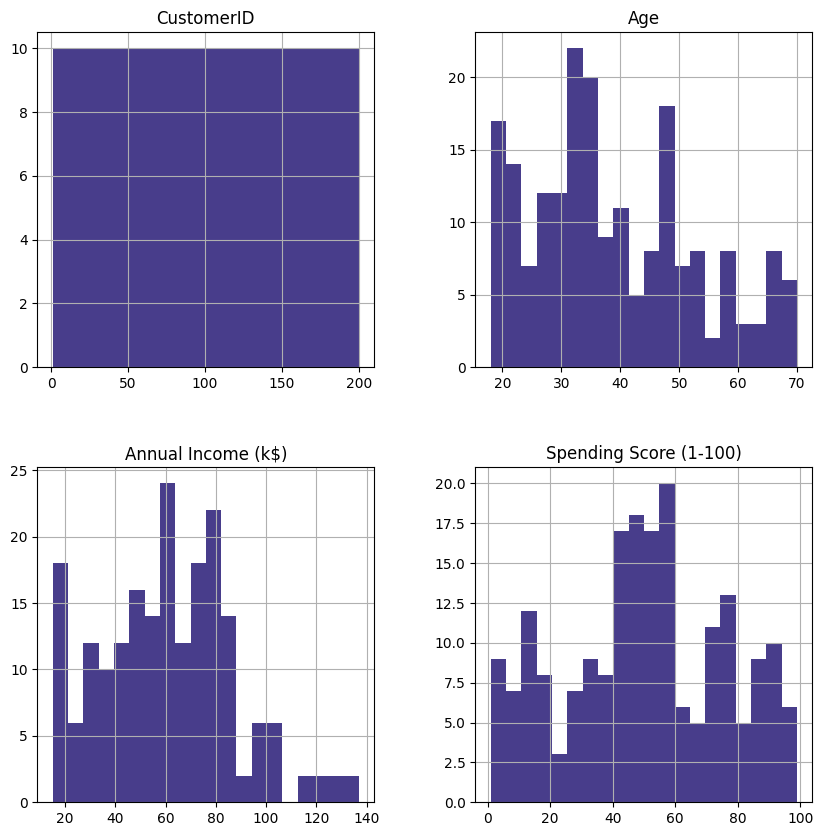

In [10]:
mall_customers.hist(figsize=(10,10),bins=20,color='#483D8B')
plt.show()

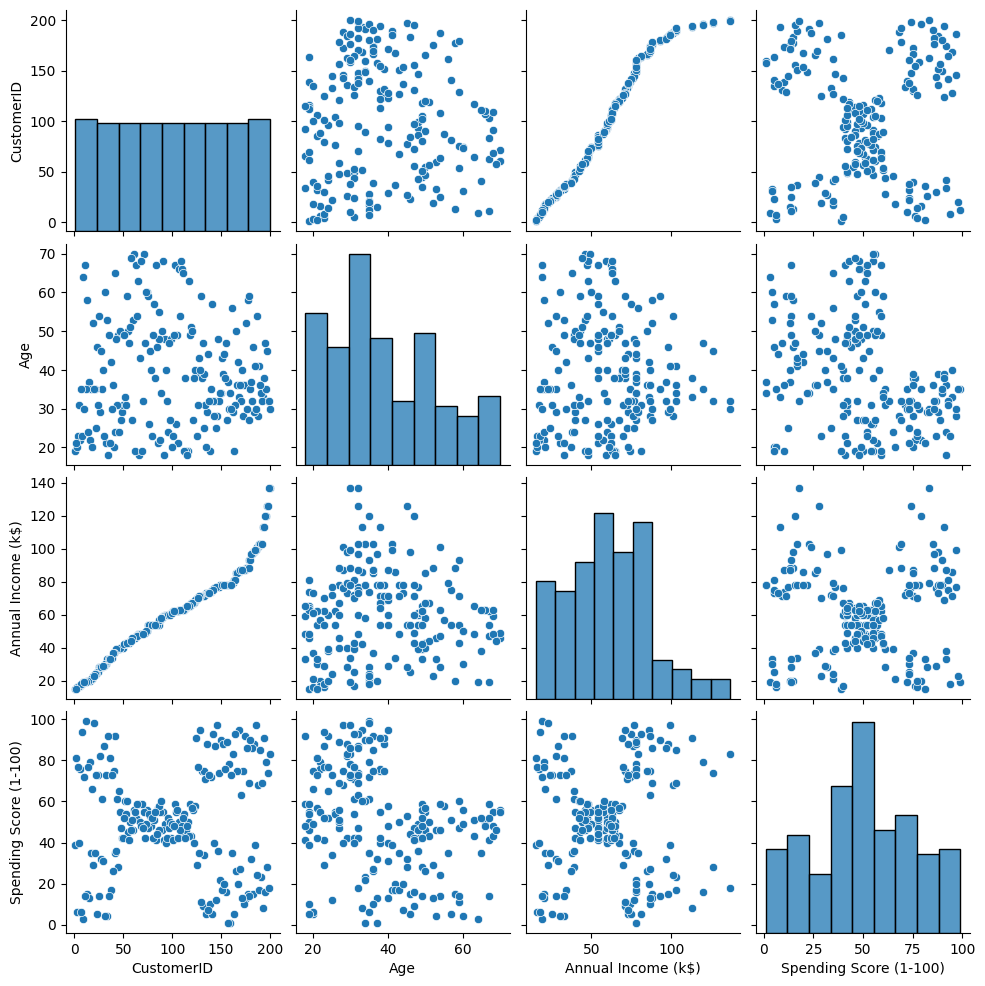

In [11]:
sample = mall_customers.sample(200)
sns.pairplot(sample)
#It plots the correlation between every feature and itself

<Axes: xlabel='Gender', ylabel='Count'>

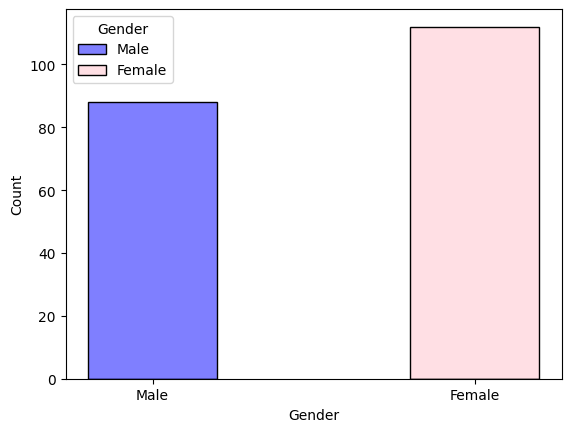

In [12]:
sns.histplot(x='Gender', data=mall_customers, hue='Gender',
             palette=['blue', 'pink'] , shrink = 0.4)
# shrink mean the value size on the x axis

**Here we see that the majority is Female**

Text(0.5, 1.0, 'Age Distribution')

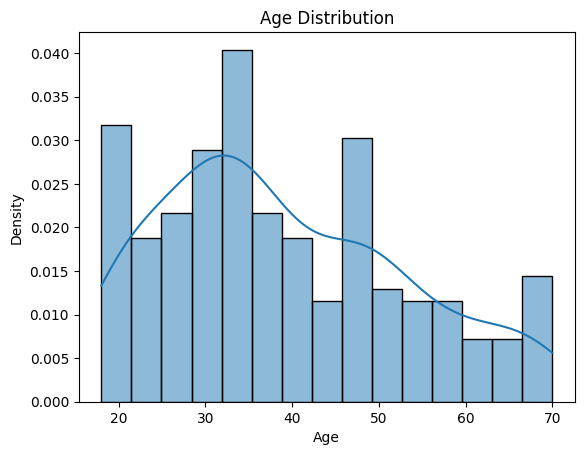

In [13]:
sns.histplot(mall_customers['Age'] , stat='density' , bins =15 , kde=True)
plt.title("Age Distribution")

**The majority here in the Age in range between 30-35 and it's almost uniform distribution**

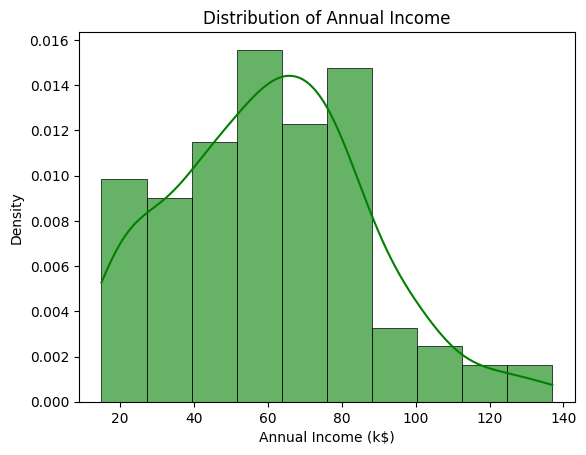

In [14]:
sns.histplot(data=mall_customers,x="Annual Income (k$)",stat="density",kde=True,color="green",alpha=0.6,linewidth=0.5,bins=10)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Density')
plt.title('Distribution of Annual Income')
plt.show()

Text(0, 0.5, 'Density')

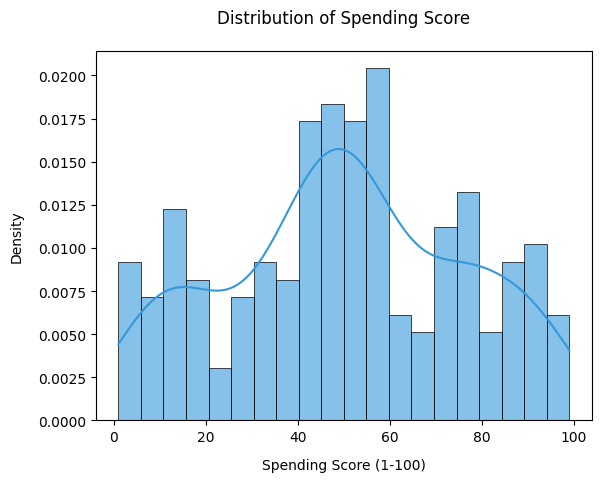

In [15]:
sns.histplot(data=mall_customers,x="Spending Score (1-100)",stat="density",kde=True,color="#3498db",alpha=0.6,linewidth=0.5,bins=20)
plt.title("Distribution of Spending Score", pad=20)
plt.xlabel("Spending Score (1-100)", labelpad=10)
plt.ylabel("Density", labelpad=10)

The peak from 40-60

# Preprocessing

**Encoding our categorical feature ("Gender") using the binary encoder**

In [16]:
encoder = BinaryEncoder(cols=['Gender'])
X_encoded = encoder.fit_transform(mall_customers)
mall_customers = X_encoded

In [17]:
mall_customers

CustomerID  Gender_0  Gender_1  Age  Annual Income (k$)  \
0             1         0         1   19                  15   
1             2         0         1   21                  15   
2             3         1         0   20                  16   
3             4         1         0   23                  16   
4             5         1         0   31                  17   
..          ...       ...       ...  ...                 ...   
195         196         1         0   35                 120   
196         197         1         0   45                 126   
197         198         0         1   32                 126   
198         199         0         1   32                 137   
199         200         0         1   30                 137   

     Spending Score (1-100)  
0                        39  
1                        81  
2                         6  
3                        77  
4                        40  
..                      ...  
195                      79  
196                      28  
197                      74  
198                      18  
199                      83  

[200 rows x 6 columns]

**Gender_1 is male **

**We will drop the ("CustomerID") feature because it cannot affect anything at work.**

In [18]:
mall_customers = mall_customers.drop(['CustomerID'], axis=1)

In [19]:
mall_customers

Gender_0  Gender_1  Age  Annual Income (k$)  Spending Score (1-100)
0           0         1   19                  15                      39
1           0         1   21                  15                      81
2           1         0   20                  16                       6
3           1         0   23                  16                      77
4           1         0   31                  17                      40
..        ...       ...  ...                 ...                     ...
195         1         0   35                 120                      79
196         1         0   45                 126                      28
197         0         1   32                 126                      74
198         0         1   32                 137                      18
199         0         1   30                 137                      83

[200 rows x 5 columns]

In [20]:
skewed_features = mall_customers.skew().sort_values(ascending=False)
skewed_features

Age                       0.485569
Annual Income (k$)        0.321843
Gender_1                  0.243578
Spending Score (1-100)   -0.047220
Gender_0                 -0.243578
dtype: float64

**All features is approximately symmetric.So no need to fix it**

In [21]:
Q75=mall_customers.quantile(0.75)
Q25=mall_customers.quantile(0.25)
IQR=Q75-Q25
min_point= Q25- IQR*1.5
max_point= Q75+ IQR*1.5
Outliers=((mall_customers<min_point)|(mall_customers>max_point))
print(Outliers.sum())

Gender_0                  0
Gender_1                  0
Age                       0
Annual Income (k$)        2
Spending Score (1-100)    0
dtype: int64


There is no outliers...just 2 datapoints in the ("Annual Income (k$)") so no need to fix it..

In [22]:
threshold = 0.5
FeaturesCorr=mall_customers.corr().abs()
for feature in FeaturesCorr.columns:

    high_corr = FeaturesCorr[feature][(FeaturesCorr[feature] > threshold) & (FeaturesCorr[feature] < 1)].index.tolist()

high_corr

[]

NO features in the dataset have a correlation higher than 0.5 with each other.

Lets see the heatmap to show everything...

Text(0.5, 1.0, 'Correlation Matrix')

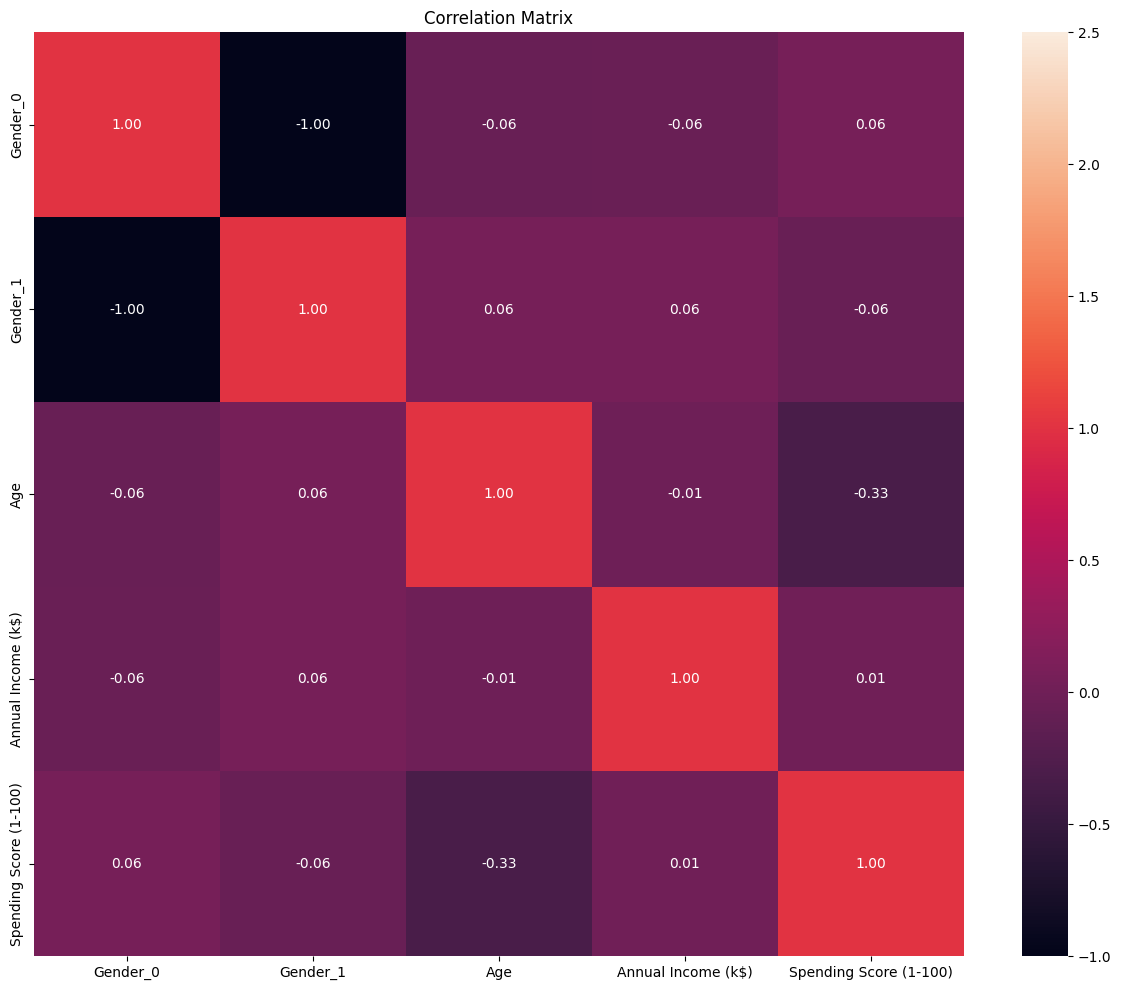

In [23]:
plt.figure(figsize=(15,12))
sns.heatmap(mall_customers.corr(),annot=True,fmt=".2f", vmin=-1, vmax=2.5)
plt.title('Correlation Matrix')

Number of components to retain 90% variance: 4


<ipython-input-24-d77ccd5d444c>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=pca_df, x='PC1', y='PC2', palette=['#483D8B','#E7F255'], s=100, alpha=0.7, edgecolor='k', marker='o')
<ipython-input-24-d77ccd5d444c>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Class', fontsize=12)


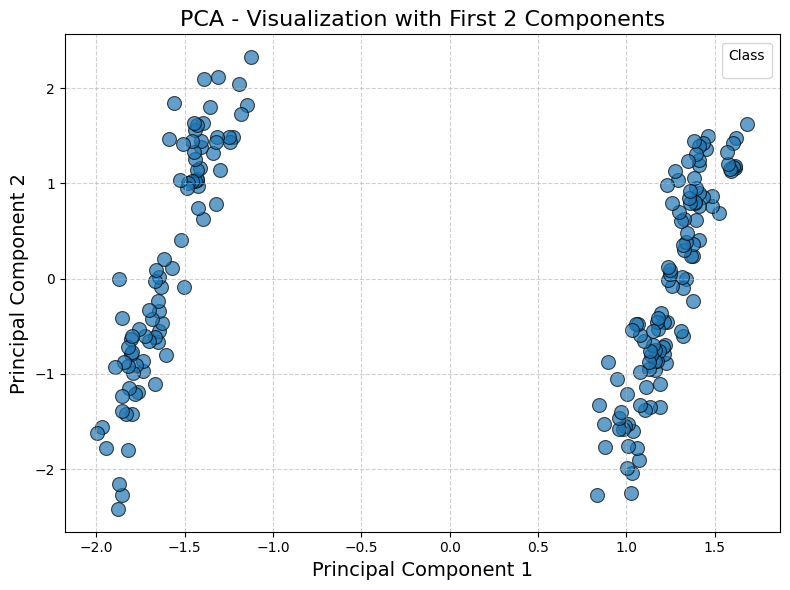

In [24]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(mall_customers)


pca = PCA(n_components=0.93)
X_pca = pca.fit_transform(X_scaled)
print("Number of components to retain 90% variance:" ,pca.n_components_)
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(pca.n_components_)])



plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', palette=['#483D8B','#E7F255'], s=100, alpha=0.7, edgecolor='k', marker='o')
plt.title('PCA - Visualization with First 2 Components', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title='Class', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



Interpretation
The data can be separated into two clear groups based on their positions in this PCA space.

This indicates that the underlying classes in the original dataset are well-separated when projected into two dimensions.

PCA has successfully preserved the class-discriminative structure in just two dimensions.

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.002s...
[t-SNE] Computed neighbors for 200 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 14.908206
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.771107
[t-SNE] KL divergence after 500 iterations: 0.194862


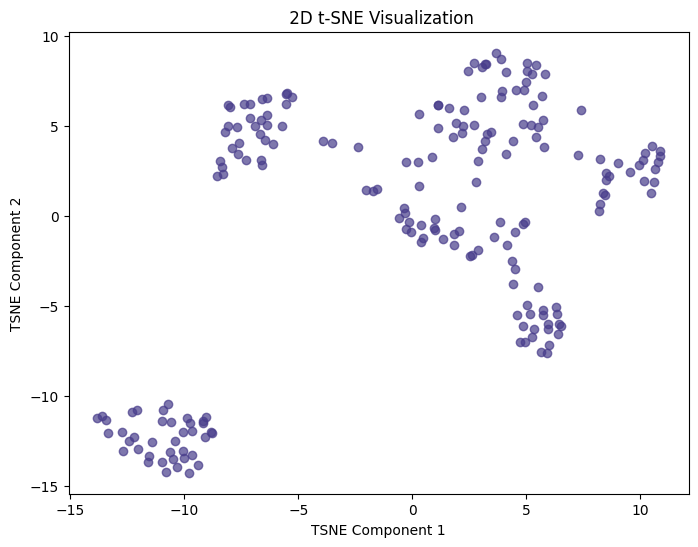

In [25]:
tsne=TSNE(n_components=2,random_state=42,perplexity=30,max_iter=500,verbose=1)
X_tsne=tsne.fit_transform(mall_customers)


plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.7,color='#483D8B')
plt.title(' 2D t-SNE Visualization')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()

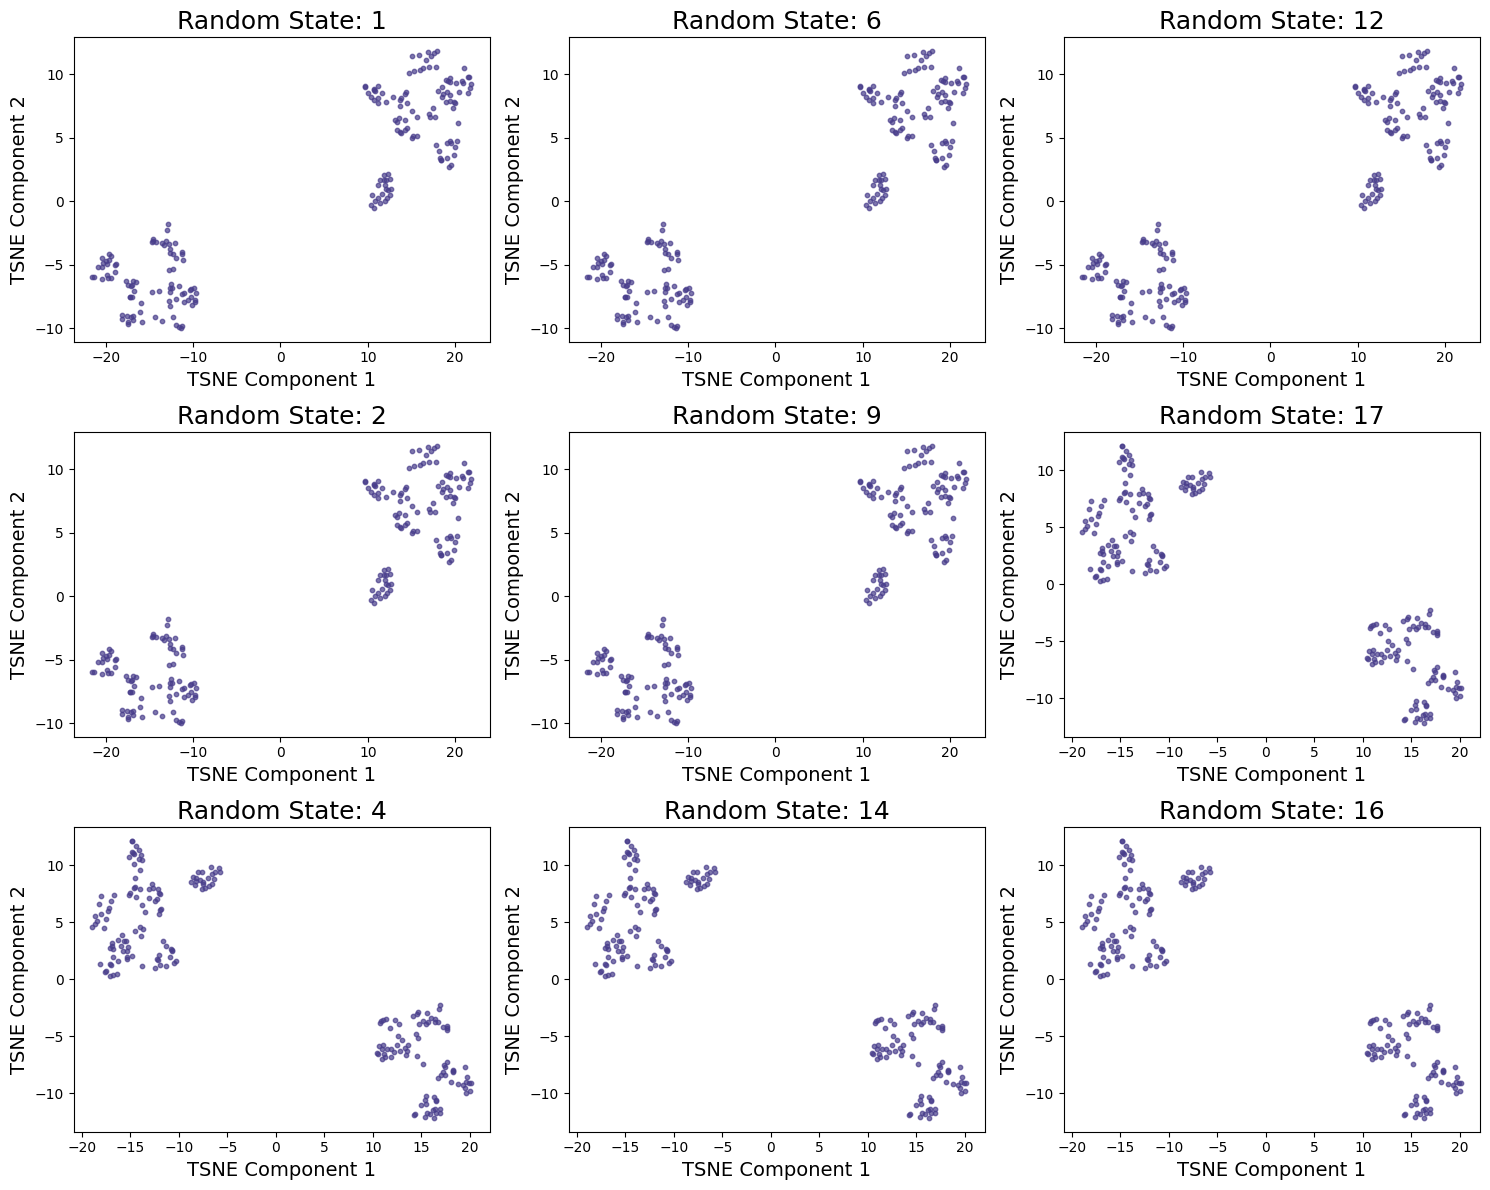

In [26]:
np.random.seed(42)
random_states=np.random.choice(range(1, 20), size=9, replace=False)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for a,i in enumerate(random_states) :

    tsne1=TSNE(n_components=2, random_state=i, perplexity=30)
    X_train_tsne=tsne1.fit_transform(X_scaled)

    ax=axes[a]
    ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], alpha=0.7, color='#483D8B', s=10)
    ax.set_title(f'Random State: {i}', fontsize=18)
    ax.set_xlabel('TSNE Component 1', fontsize=14)
    ax.set_ylabel('TSNE Component 2', fontsize=14)
plt.tight_layout()
plt.show()

In [27]:
tsne_baseline= TSNE(n_components=2, random_state=random_states[0], perplexity=30)
X_baseline= tsne_baseline.fit_transform(X_scaled)
mean_diffs = []
for i in random_states[1:]:
    tsne2=TSNE(n_components=2, random_state=i, perplexity=30)
    X_tsne=tsne2.fit_transform(X_scaled)


    diff = np.mean(np.abs(X_tsne - X_baseline))
    mean_diffs.append((i, diff))

print("Average coordinate difference:")
for state, diff in mean_diffs:
    print(f"Random State = {state}, Mean Difference = {diff:.4f}")


Average coordinate difference:
Random State = 6, Mean Difference = 0.0000
Random State = 12, Mean Difference = 0.0000
Random State = 2, Mean Difference = 0.0000
Random State = 9, Mean Difference = 0.0000
Random State = 17, Mean Difference = 16.5200
Random State = 4, Mean Difference = 16.5200
Random State = 14, Mean Difference = 16.5200
Random State = 16, Mean Difference = 16.5200


Feature Engineering

In [28]:
#chat
#mall_customers['Income_per_Age'] = mall_customers['Annual Income (k$)'] / mall_customers['Age']


# mall_customers['SpendingCategory'] = pd.cut(mall_customers['Spending Score (1-100)'],bins=[0, 33, 66, 100],labels=[0,1,2])

# def bin_income(df):
#     bins = [0, 40, 70, 150]
#     labels = [0, 1, 2]
#     df['Income_Bin'] = pd.cut(df['Annual Income (k$)'], bins=bins, labels=labels)
#     return df
# bin_income(mall_customers)

In [29]:
# Bin Spending Score and drop the original column
mall_customers['SpendingCategory'] = pd.cut(
    mall_customers['Spending Score (1-100)'],
    bins=[0, 33, 66, 100],
    labels=[0, 1, 2]
)
mall_customers.drop('Spending Score (1-100)', axis=1, inplace=True)

# Bin Income and drop the original column
mall_customers['Income_Bin'] = pd.cut(
    mall_customers['Annual Income (k$)'],
    bins=[0, 40, 70, 150],
    labels=[0, 1, 2]
)
mall_customers.drop('Annual Income (k$)', axis=1, inplace=True)


Text(0.5, 1.0, 'Correlation Matrix')

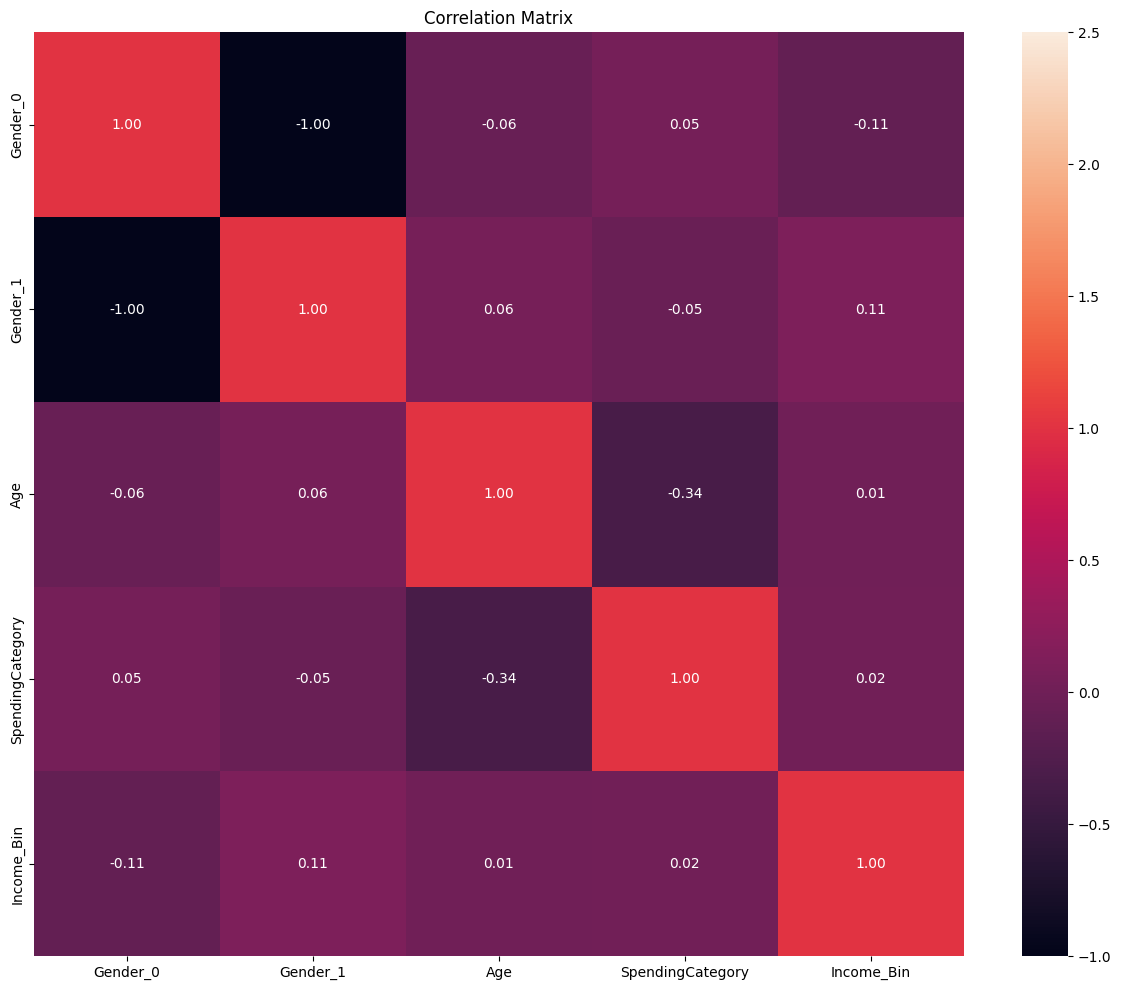

In [30]:
plt.figure(figsize=(15,12))
sns.heatmap(mall_customers.corr(),annot=True,fmt=".2f", vmin=-1, vmax=2.5)
plt.title('Correlation Matrix')

#Scaling

In [31]:
scaler=StandardScaler()
X_scaled = scaler.fit_transform(mall_customers)

# PCA

In [32]:
pca = PCA().fit(X_scaled)

In [33]:
eigenvalues=pca.explained_variance_
eigenvalues

array([2.05029382, 1.33302465, 0.98111946, 0.66068769, 0.        ])

pca.explained_variance_ returns the **eigenvalues** corresponding to each principal component. These values represent the **amount of variance** captured by each component in the transformed feature space.

This means:
- The **first principal component** captures 2.38 units of variance from the original data.
- The **second principal component** captures 2.07 units.
- The **third principal component** captures 1.63 units, and so on.

Larger eigenvalues indicate that the component explains more variability in the data. PCA arranges components in decreasing order of these values, so the first components are the most informative. These eigenvalues are also used to compute the explained variance ratio, which helps in selecting the number of components to retain.




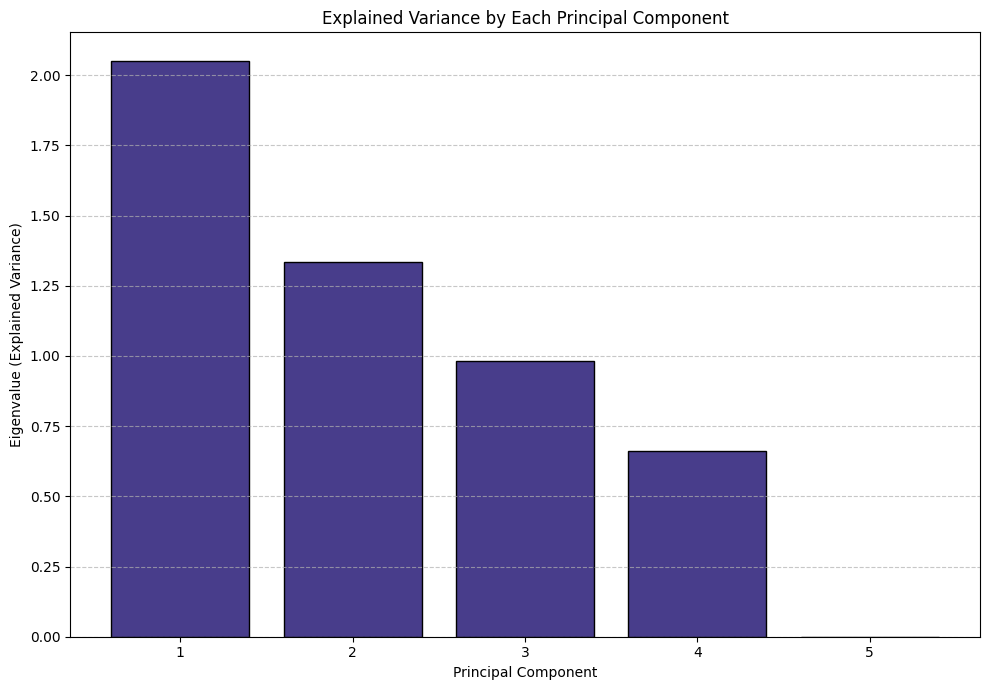

In [34]:
components = np.arange(1, len(eigenvalues) + 1)

plt.figure(figsize=(10, 7))
plt.bar(components, eigenvalues, color='#483D8B', edgecolor='black')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue (Explained Variance)')
plt.title('Explained Variance by Each Principal Component')
plt.xticks(components)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [35]:
cumulativeVariance=np.cumsum(pca.explained_variance_ratio_)#This line calculates the cumulative sum of the variance explained by each principal component in PCA
cumulativeVariance

array([0.40800847, 0.67328038, 0.86852315, 1.        , 1.        ])

The goal is to calculate the total variance explained by the first n principal components, helping decide how many components are needed to capture a desired percentage of the total variance.

In [36]:
n_components=np.argmax(cumulativeVariance>=0.93)+1 #Determines the number of principal components needed to retain at least 93% of the cumulative variance in PCA
print('The number of principal component is:' ,n_components)

The number of principal component is: 4


In [37]:
plt.figure(figsize=(10,6))
fig = go.Figure()
#cumulative variance plot
fig.add_trace(go.Scatter(x=list(range(1, len(cumulativeVariance) + 1)),
                         y=cumulativeVariance,
                         mode='markers+lines',
                         name='Cumulative Variance',
                         marker=dict(color='#483D8B')
                        ))

# Add the 95% threshold line
fig.add_trace(go.Scatter(x=[1, len(cumulativeVariance)],
                         y=[0.93, 0.93],
                         mode='lines',
                         name='93% Threshold',
                         line=dict(dash='dash'),
                         marker=dict(color='#E7F255')
                        ))


fig.update_layout(
    title="Cumulative Variance vs Number of Principal Components",
    xaxis_title="Number of Principal Components",
    yaxis_title="Cumulative Variance Percentage",
    template="plotly_dark",
    showlegend=True
)

fig.show()

<Figure size 1000x600 with 0 Axes>

In [38]:
print(X_scaled.shape)

(200, 5)


In [39]:
pca2=PCA(n_components=n_components)
X_train_pca=pca2.fit_transform(X_scaled)

In [40]:
print(X_train_pca.shape)

(200, 4)


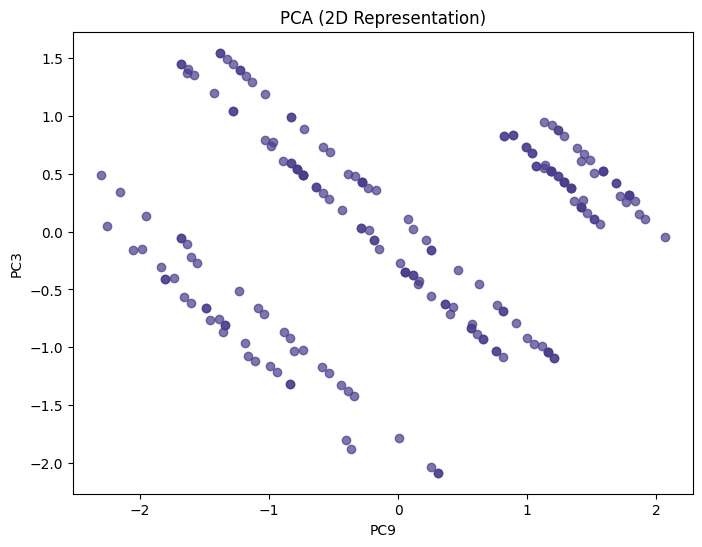

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:,1], X_train_pca[:,3], alpha=0.7,color='#483D8B')# the components are chosen randomly
plt.title('PCA (2D Representation)')
plt.xlabel('PC9')
plt.ylabel('PC3')
plt.show()

# TSNE

In [42]:
tsne=TSNE(n_components=1,random_state=42,perplexity=30,max_iter=500,verbose=1)
X_train_tsne=tsne.fit_transform(X_train_pca)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.001s...
[t-SNE] Computed neighbors for 200 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 1.084727
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.322361
[t-SNE] KL divergence after 500 iterations: 0.333516


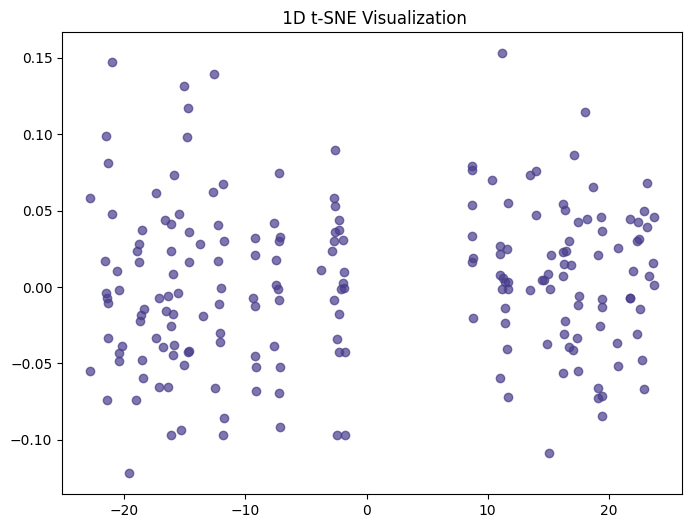

In [43]:
plt.figure(figsize=(8, 6))
j = np.random.normal(0, 0.05, size=X_train_tsne.shape)
plt.scatter(X_train_tsne.flatten(),j.flatten(), alpha=0.7,color='#483D8B')
plt.title(' 1D t-SNE Visualization')
plt.show()

In [44]:
tsne=TSNE(n_components=2,random_state=42,perplexity=30,max_iter=500,verbose=1)
X_train_tsne=tsne.fit_transform(X_train_pca)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.001s...
[t-SNE] Computed neighbors for 200 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 1.084727
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.978996
[t-SNE] KL divergence after 500 iterations: 0.109588


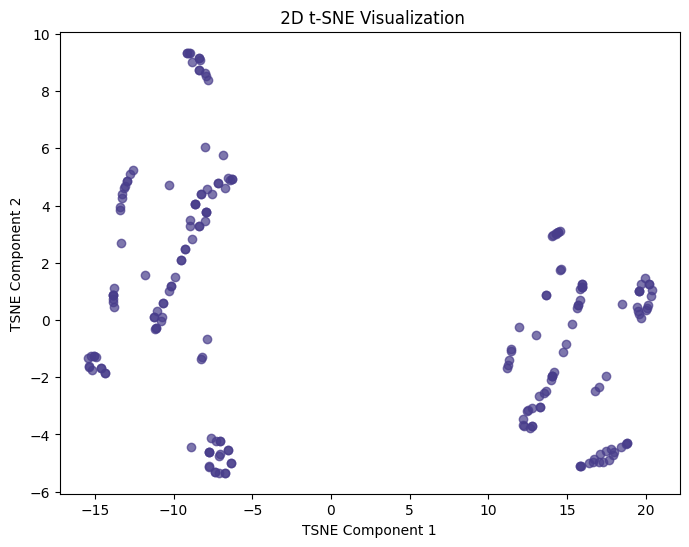

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], alpha=0.7,color='#483D8B')
plt.title(' 2D t-SNE Visualization')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()

In [46]:
tsne=TSNE(n_components=3,random_state=42,perplexity=30,max_iter=500,verbose=1)
X_train_tsne=tsne.fit_transform(X_train_pca)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.001s...
[t-SNE] Computed neighbors for 200 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 1.084727
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.673473
[t-SNE] KL divergence after 500 iterations: 0.263040


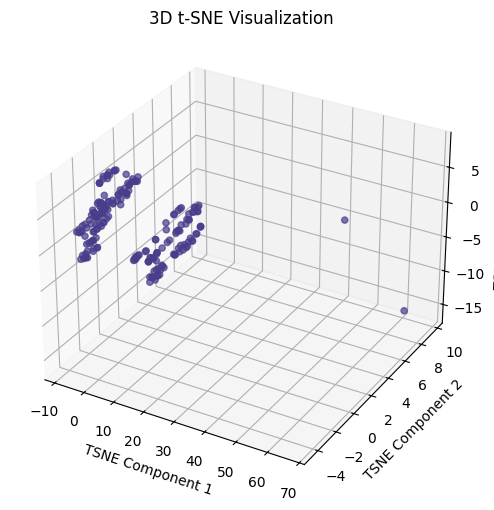

In [47]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], X_train_tsne[:, 2], alpha=0.7,color='#483D8B')
ax.set_title('3D t-SNE Visualization')
ax.set_xlabel('TSNE Component 1')
ax.set_ylabel('TSNE Component 2')
ax.set_zlabel('TSNE Component 3')

plt.show()

# **Kmeans**

**This code track memory usage and execution time of a process in a program**

In [48]:
def track_memory():
  cu_mem=psutil.Process()
  start_time=time.time()
  return cu_mem,start_time
def print_memory_usage(cu_mem,start_time,model_name):
  end_time=time.time()
  memory_used=cu_mem.memory_info().rss/(1024**2)
  execution_time=end_time-start_time
  return memory_used,execution_time


track_memory() initializes a process monitor and captures the start time to measure resource usage.

print_memory_usage() calculates and returns the memory (in MB) and execution time (in seconds) used by a model or operation.

**1.Standard Kmeans:**

In [49]:
cu_mem,start_time=track_memory()
model_1=KMeans(n_clusters=2,random_state=0,init='random')
model_1.fit(X_train_pca)
memory_used,execution_time=print_memory_usage(cu_mem,start_time,'model_1')
print("Execution Time:",execution_time)
print("Memory Usage in MB:",memory_used)
pridiction=model_1.predict(X_train_pca)

Execution Time: 0.023207426071166992
Memory Usage in MB: 400.83984375


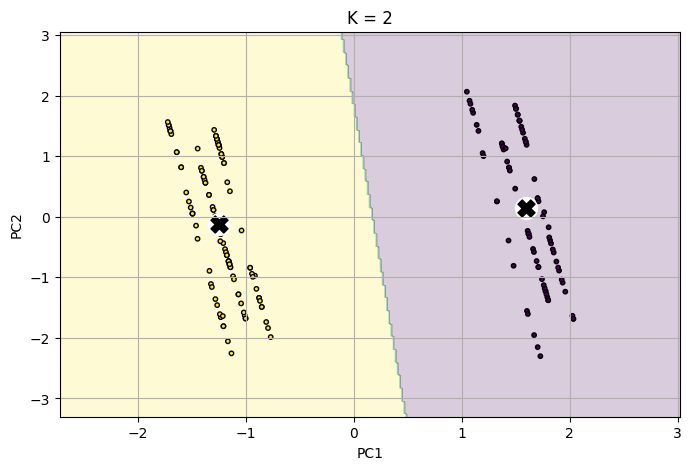

In [50]:
h = 0.02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
cmap = plt.get_cmap('viridis', 5)

grid = np.zeros((xx.ravel().shape[0], X_train_pca.shape[1]))
grid[:, 0] = xx.ravel()
grid[:, 1] = yy.ravel()

Z = model_1.predict(grid).reshape(xx.shape)
fig,ax=plt.subplots(1,1,figsize=(8,5))
ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.2)
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=model_1.labels_, cmap=cmap, s=10, edgecolor='k')
ax.scatter(model_1.cluster_centers_[:, 0], model_1.cluster_centers_[:, 1], c='white', marker='o', s=250)
ax.scatter(model_1.cluster_centers_[:, 0], model_1.cluster_centers_[:, 1], c='black', marker='X', s=150)
ax.set_title("K = 2")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.grid()
plt.show()

This plot shows the clustering result obtained using Standard KMeans with K=2,the dataset is partitioned into two clusters,visually represented by distinct colors and separated by a decision boundary ,eacht point's color corresponds to its cluster,
this visual segmentation alone does not confirm the clustering's optimality ,To further evaluate the quality of this clustering, we will now calculate the Inertia and Silhouette Score, which help determine whether this division is meaningful and well-separated.

In [51]:
print("Inertia Value: ",model_1.inertia_)
print("Silhouette Score:",silhouette_score(X_train_pca, pridiction,random_state=42))

Inertia Value:  596.3963346493065
Silhouette Score: 0.39795645599174007


**The inertia value of ~596.396 indicates the total within-cluster variance, but by itself, it doesn't confirm the clustering quality. The silhouette score of ~0.398 suggests moderate separation between clusters, better than weak. It may not be ideal (since good scores are typically > 0.5), but it does not reflect poor clustering.**

In [52]:
k_values = range(2,21)
inertia=[]
silhouette_scores={}
models={}

for k in k_values:
  kmeans=KMeans(n_clusters=k,random_state=42,init='random')
  kmeans.fit(X_train_pca)
  inertia.append(kmeans.inertia_)
  silhouette_scores[k]=silhouette_score(X_train_pca,kmeans.labels_,random_state=42)
  models[k]=kmeans

In [53]:
#this cell aims to find the best k
kl = KneeLocator(k_values, inertia, curve="convex", direction="decreasing")
best_k = kl.elbow
print("Best k (Elbow Point) = ",best_k)

Best k (Elbow Point) =  9


This cell uses the KneeLocator to identify the best number of clusters by detecting the elbow point based on the inertia curve,it works by analyzing the curve of (number of clusters , inertia ) it detects the point of maximum curvature where the curve bends most sharply


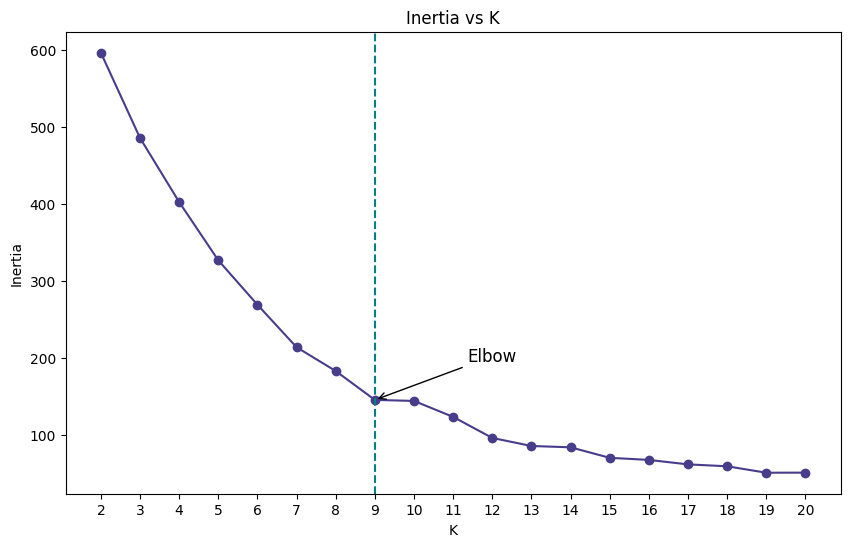

In [54]:
plt.figure(figsize=(10,6))
plt.plot(k_values,inertia,marker='o',color='#483D8B')
plt.title('Inertia vs K')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.xticks(k_values)
elbow_x = best_k
elbow_y = inertia[best_k -2]
plt.axvline(best_k, color='#008080', linestyle='--', label=f"Best k = {best_k}")
plt.annotate("Elbow",
             xy=(elbow_x, elbow_y),
             xytext=(elbow_x + 3, elbow_y+50),
             arrowprops=dict(facecolor='black', arrowstyle="->"),
             fontsize=12,
             ha='center')
plt.show()

In [55]:
kmeans11 = KMeans(n_clusters=best_k, random_state=0,init='random')
kmeans11.fit(X_train_pca)

train_clusters1=kmeans11.predict(X_train_pca)

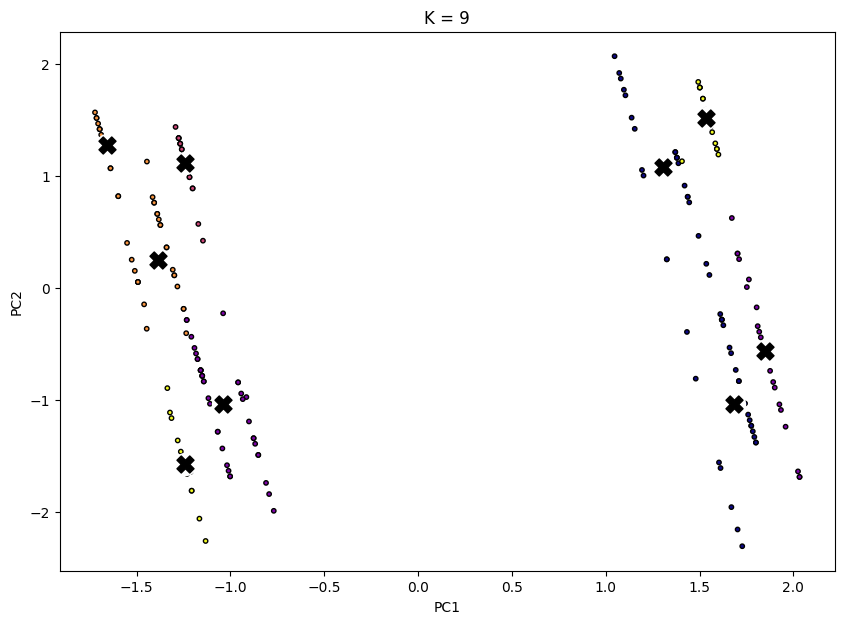

In [56]:
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
cmap = plt.get_cmap('plasma', 5)

grid = np.zeros((xx.ravel().shape[0], X_train_pca.shape[1]))
grid[:, 0] = xx.ravel()
grid[:, 1] = yy.ravel()

Z = kmeans11.predict(grid).reshape(xx.shape)
fig,ax=plt.subplots(1,1,figsize=(10,7))
#ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.2)
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans11.labels_, cmap=cmap, s=10, edgecolor='k')
ax.scatter(kmeans11.cluster_centers_[:, 0], kmeans11.cluster_centers_[:, 1], c='white', marker='o', s=250)
ax.scatter(kmeans11.cluster_centers_[:, 0], kmeans11.cluster_centers_[:, 1], c='black', marker='X', s=150)
ax.set_title(f"K = {best_k}")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

plt.show()

In [57]:
best_k_standard = max(silhouette_scores, key=silhouette_scores.get)
print("Best k based on Silhouette Score = ",best_k_standard)

Best k based on Silhouette Score =  17


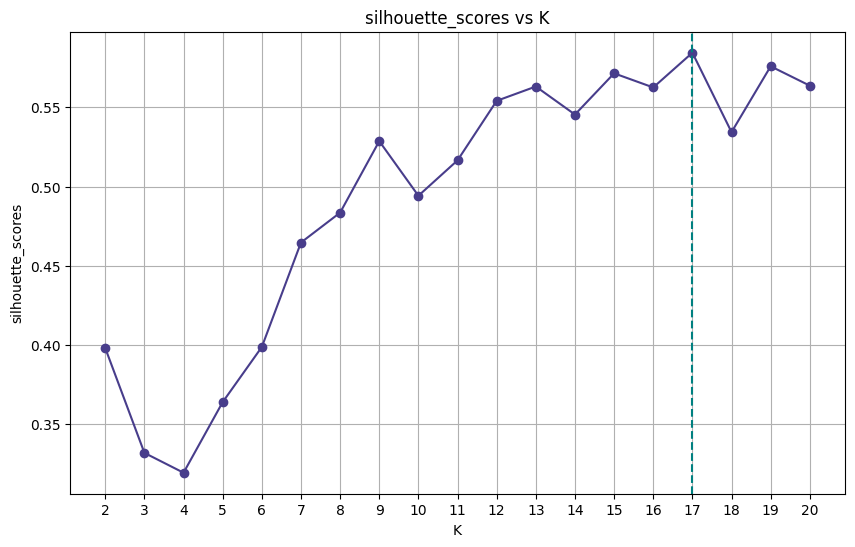

In [58]:
plt.figure(figsize=(10,6))
plt.plot(list(silhouette_scores.keys()),list(silhouette_scores.values()),marker='o',color='#483D8B')
plt.title('silhouette_scores vs K')
plt.xlabel('K')
plt.xticks(k_values)
plt.ylabel('silhouette_scores')
plt.grid()

plt.axvline(best_k_standard, color='#008080', linestyle='--', label=f"Best k = {best_k}")
plt.show()

This plot displays the Silhouette Score for different values of K (number of clusters).
The goal is to identify the value of K that yields the highest Silhouette Score, indicating the most well-defined clusters.

In this case, the peak score occurs at K = 13, suggesting that 13 is the optimal number of clusters for this dataset.

Conclusion:
Choosing K = 13 provides the best balance between intra-cluster similarity and inter-cluster separation, leading to better clustering performance.





In [59]:
kmeans12 = KMeans(n_clusters=best_k_standard, random_state=0,init='random')
kmeans12.fit(X_train_pca)

train_clusters2=kmeans12.predict(X_train_pca)

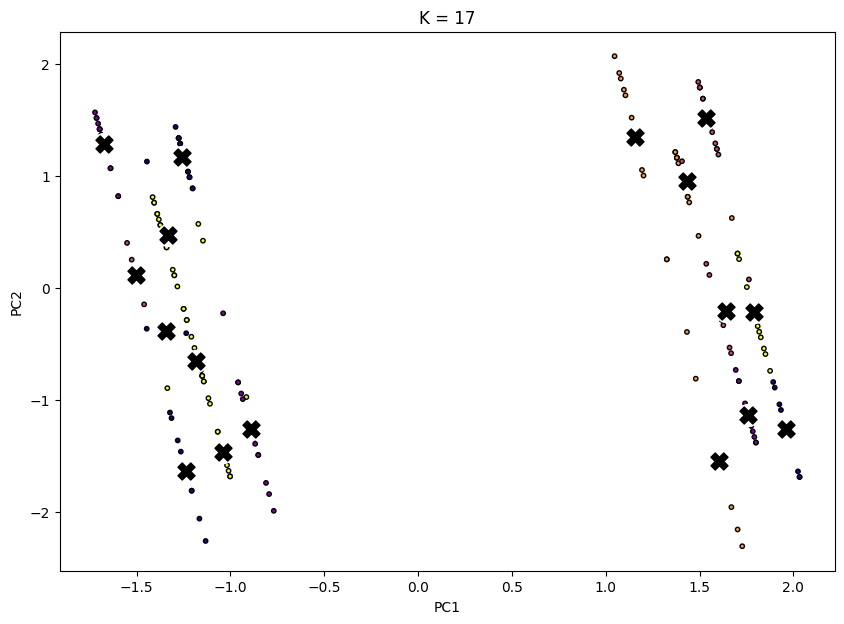

In [60]:
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
cmap = plt.get_cmap('plasma', 5)

grid = np.zeros((xx.ravel().shape[0], X_train_pca.shape[1]))
grid[:, 0] = xx.ravel()
grid[:, 1] = yy.ravel()

Z = kmeans12.predict(grid).reshape(xx.shape)
fig,ax=plt.subplots(1,1,figsize=(10,7))
#ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.2)
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans12.labels_, cmap=cmap, s=10, edgecolor='k')
ax.scatter(kmeans12.cluster_centers_[:, 0], kmeans12.cluster_centers_[:, 1], c='white', marker='o', s=250)
ax.scatter(kmeans12.cluster_centers_[:, 0], kmeans12.cluster_centers_[:, 1], c='black', marker='X', s=150)
ax.set_title(f"K = {best_k_standard}")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
#ax.grid()
plt.show()

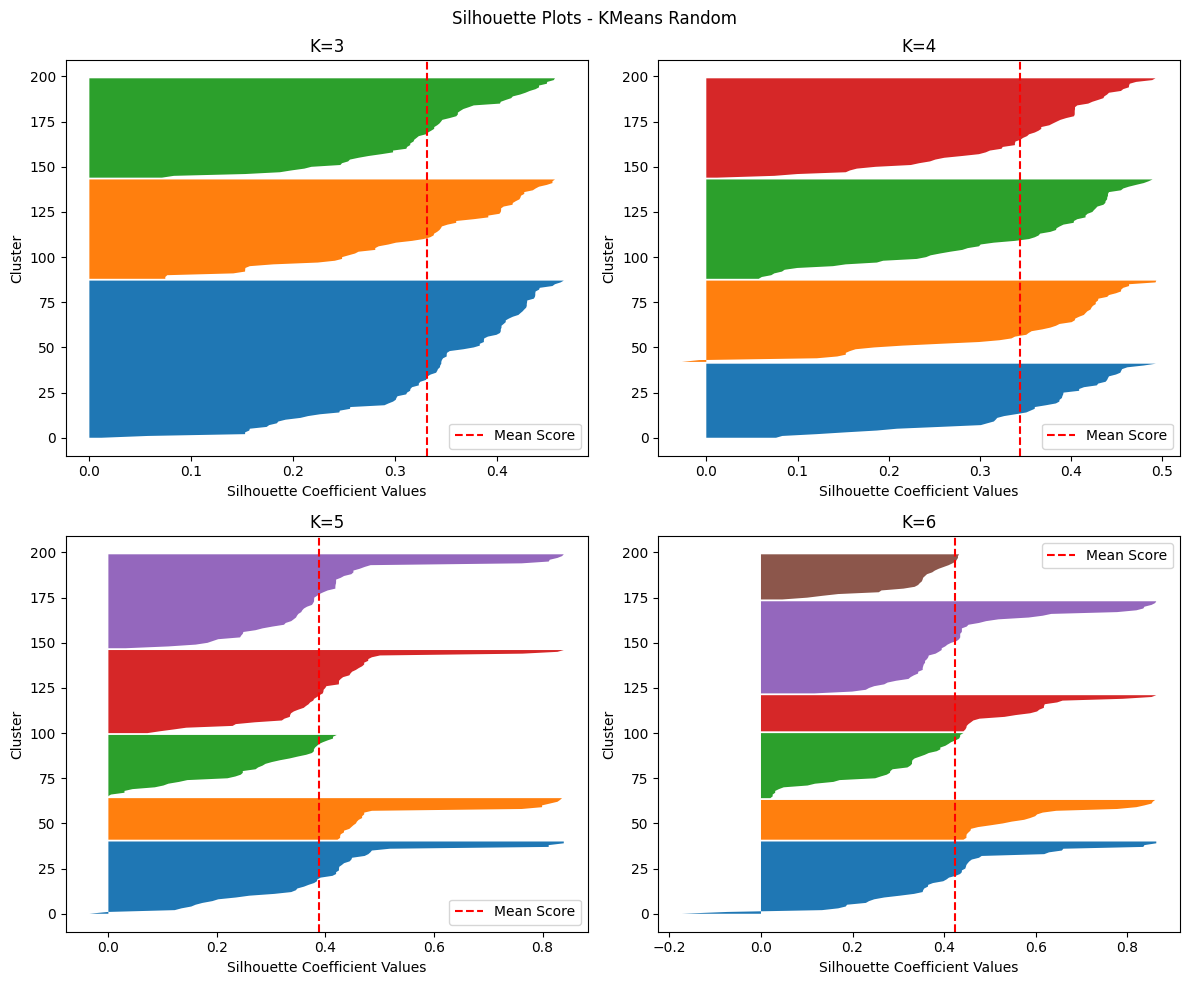

In [61]:
# Function to plot silhouette analysis
def plot_silhouette(ax, X, labels, title):
    silhouette_vals = silhouette_samples(X, labels)
    y_lower, y_upper = 0, 0
    sorted_silhouette_vals = np.sort(silhouette_vals)

    for i in range(len(np.unique(labels))):
        ith_cluster_silhouette_vals = sorted_silhouette_vals[labels == i]
        y_upper += len(ith_cluster_silhouette_vals)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals)
        y_lower = y_upper

    ax.axvline(np.mean(silhouette_vals), color="red", linestyle="--", label="Mean Score")
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster")
    ax.set_title(title)
    ax.legend()

# Range of K values to test
k_values = [3, 4, 5, 6]

# Create subplots for K-Means Random Initialization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Silhouette Plots - KMeans Random")

for ax, k in zip(axes.flatten(), k_values):
    kmeans = KMeans(n_clusters=k, init='random', random_state=7, n_init=10)
    kmeans_labels = kmeans.fit_predict(X_train_pca)
    plot_silhouette(ax, X_train_pca, kmeans_labels, f"K={k}")

plt.tight_layout()
plt.show()

**Silhouette Analysis Summary :**

This plot shows the Silhouette Coefficients for different values of **k** (number of clusters). Each subplot corresponds to a different value of `k`, and visualizes the silhouette score distribution across the clusters.

#### Key Observations:
- The **red dashed line** represents the **average silhouette score** for each `k`.
- A **higher average silhouette score** indicates better-defined clusters.
- When:
  - **k = 2 or 3**: Clusters appear more compact and separated.
  - **k = 5 and beyond**: Many clusters have silhouette scores near 0 or even negative, indicating overlapping or poorly separated clusters.
- **k = 3 to 5** may be reasonable choices for clustering, as they show a better balance between compactness and separation.

#### What is Silhouette Score?
It ranges from -1 to 1:
- Close to **1** → well-clustered, far from neighboring clusters.
- Close to **0** → on the border of two clusters.
- Close to **-1** → possibly assigned to the wrong cluster.

This analysis helps in choosing the **optimal `k`** by looking for the highest average silhouette score with consistently high individual cluster scores.


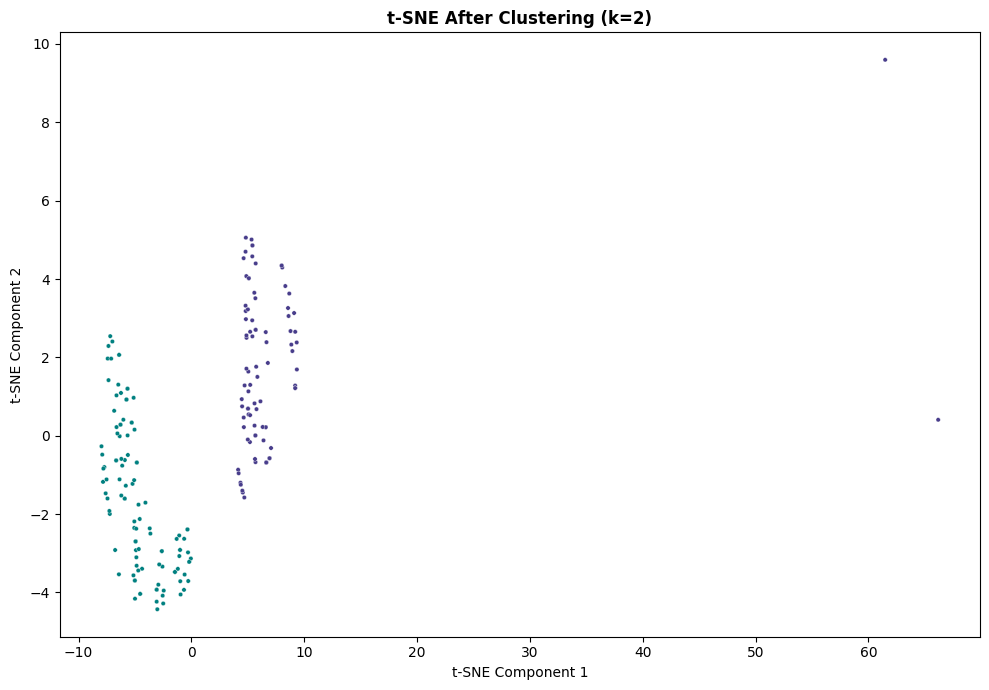

In [62]:
kmeans=KMeans(n_clusters=2,random_state=0,init='random')
kmeans.fit(X_train_tsne)

plt.figure(figsize=(10,7))

label=kmeans.predict(X_train_tsne)
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=label, palette=['#483D8B','#008080'], s=10, legend=None)
plt.title(f"t-SNE After Clustering (k={2})",  fontweight="bold")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.tight_layout()
plt.show()

t-SNE visualization after applying Standard K-Means clustering with
𝑘
=
2
k=2. The plot shows the distribution of data points reduced to two dimensions using t-SNE, capturing the complex structure of the original dimensional space. The two clusters are colored differently, highlighting the separation achieved through the improved K-Means++ initialization, which helps in faster convergence and better clustering quality.

In [63]:
kmeans_full=KMeans(n_clusters=best_k_standard,random_state=42,init="random")
kmeans_full.fit(X_scaled)
train_clusters_full=kmeans_full.predict(X_scaled)

In [64]:
inertia_scaled = kmeans_full.inertia_
silhouette_scaled = silhouette_score(X_scaled, train_clusters_full, random_state=42)
print("Inertia Value: ",inertia_scaled)
print("Silhouette Score:",silhouette_scaled)

Inertia Value:  62.35720189821837
Silhouette Score: 0.5844984412947684


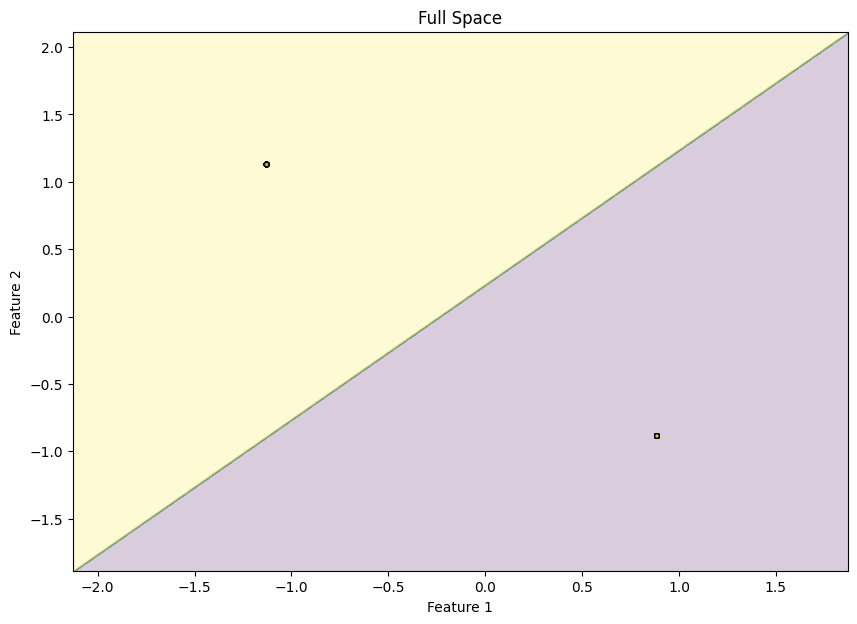

In [65]:
h=0.02
x_min,x_max=X_scaled[:,0].min()-1,X_scaled[:,0].max()+1
y_min,y_max=X_scaled[:,1].min()-1,X_scaled[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                  np.arange(y_min,y_max,h))
grid=np.zeros((xx.ravel().shape[0],X_scaled.shape[1]))
grid[:,0]=xx.ravel()
grid[:,1]=yy.ravel()
cmap=plt.get_cmap('viridis',5)
plt.figure(figsize=(10,7))
Z=kmeans_full.predict(grid).reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=cmap,alpha=0.2)
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=train_clusters_full,cmap='viridis',s=10,edgecolor='k',alpha=0.7)
plt.title("Full Space")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Comparing clustering performance with and without dimensioality reduction(PCA)

In [66]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [67]:
kmeans_2d=MiniBatchKMeans(n_clusters=best_k_standard,random_state=42,init="random")
clusterspca= kmeans_2d.fit_predict(X_pca)

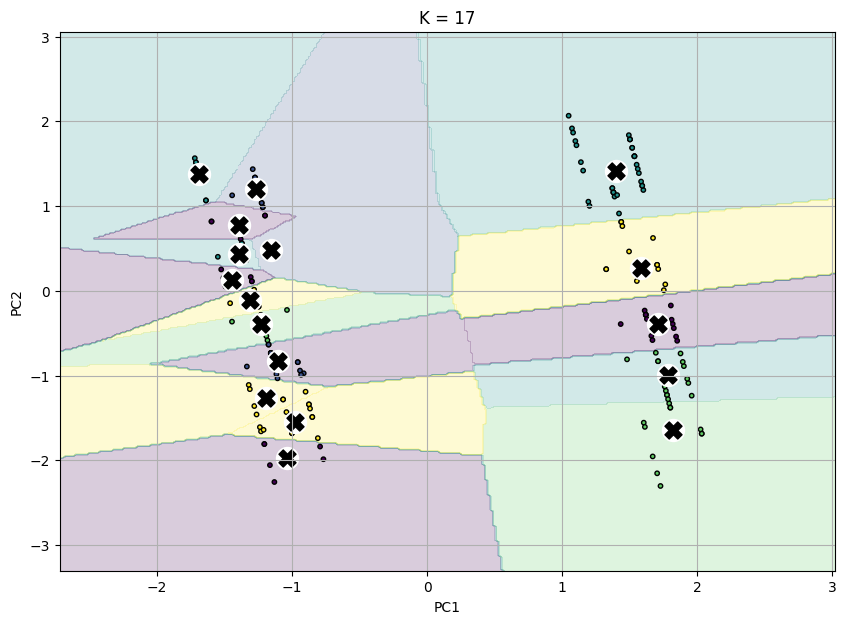

In [68]:
h = 0.02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
cmap = plt.get_cmap('viridis', 5)

grid = np.zeros((xx.ravel().shape[0], X_pca.shape[1]))
grid[:, 0] = xx.ravel()
grid[:, 1] = yy.ravel()

Z = kmeans_2d.predict(grid).reshape(xx.shape)
fig,ax=plt.subplots(1,1,figsize=(10,7))
ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.2)
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_2d.labels_, cmap=cmap, s=10, edgecolor='k')
ax.scatter(kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1], c='white', marker='o', s=250)
ax.scatter(kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1], c='black', marker='X', s=150)
ax.set_title(f"K = {best_k_standard}")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.grid()
plt.show()

**2.Kmeans++:**

In [69]:
cu_mem,start_time=track_memory()
model_2=KMeans(n_clusters=2,random_state=4,init='k-means++')
model_2.fit(X_train_pca)
memory_usedP,execution_timeP=print_memory_usage(cu_mem,start_time,'model_2')
pridiction_P=model_2.predict(X_train_pca)
print("Execution Time:",execution_time)
print("Memory Usage in MB:",memory_used)

Execution Time: 0.023207426071166992
Memory Usage in MB: 400.83984375


In [70]:
print("Inertia Value: ",model_2.inertia_)
print("Silhouette Score:",silhouette_score(X_train_pca, pridiction_P,random_state=42))

Inertia Value:  596.3963346493065
Silhouette Score: 0.39795645599174007


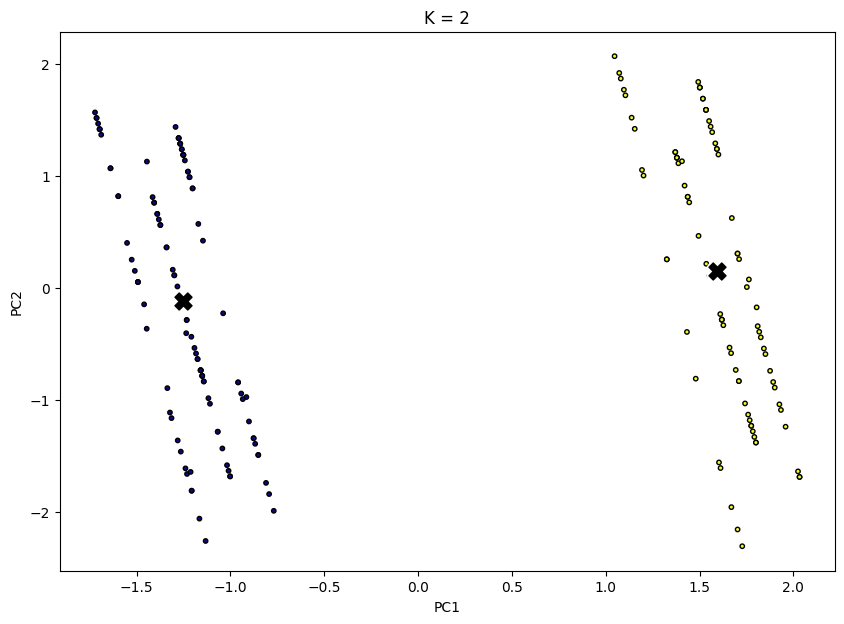

In [71]:
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
cmap = plt.get_cmap('plasma', 5)

grid = np.zeros((xx.ravel().shape[0], X_train_pca.shape[1]))
grid[:, 0] = xx.ravel()
grid[:, 1] = yy.ravel()

Z = model_2.predict(grid).reshape(xx.shape)
fig,ax=plt.subplots(1,1,figsize=(10,7))
#ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.2)
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=model_2.labels_, cmap=cmap, s=10, edgecolor='k')
ax.scatter(model_2.cluster_centers_[:, 0], model_2.cluster_centers_[:, 1], c='white', marker='o', s=250)
ax.scatter(model_2.cluster_centers_[:, 0], model_2.cluster_centers_[:, 1], c='black', marker='X', s=150)
ax.set_title("K = 2")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
#ax.grid()
plt.show()

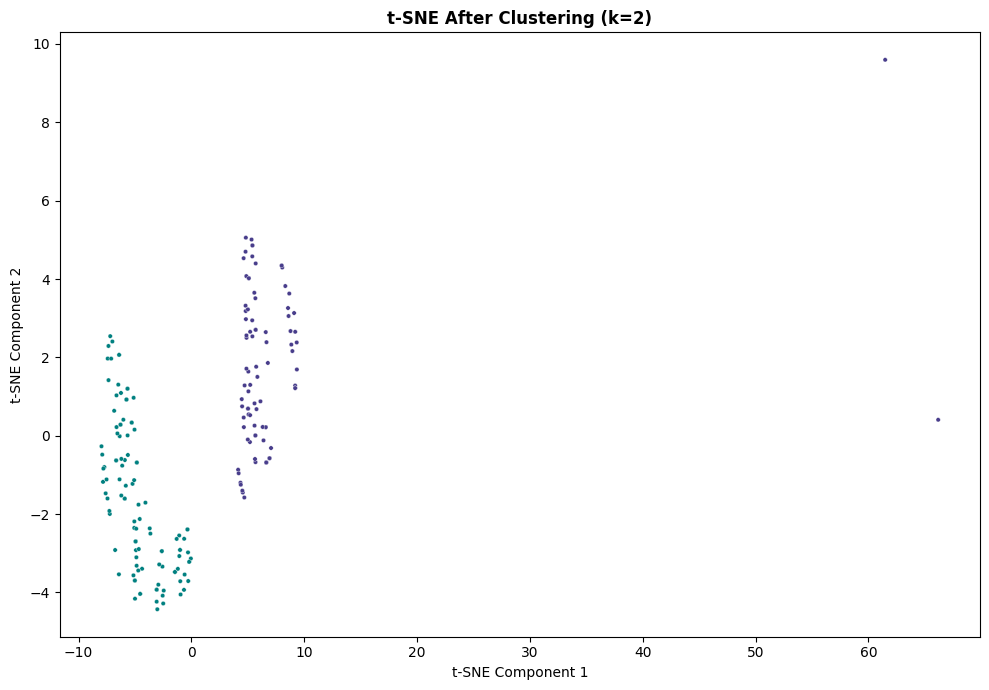

In [72]:
kmeansP=KMeans(n_clusters=2,random_state=42,init='k-means++')
kmeansP.fit(X_train_tsne)

plt.figure(figsize=(10,7))

label=kmeansP.predict(X_train_tsne)
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=label, palette=['#483D8B','#008080'], s=10, legend=None)
plt.title(f"t-SNE After Clustering (k={2})",  fontweight="bold")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.tight_layout()
plt.show()

In [73]:
k_values = range(2,21)
inertia=[]
silhouette_scores={}
models={}

for k in k_values:
  kmeans=KMeans(n_clusters=k,random_state=42,init='k-means++')
  kmeans.fit(X_train_pca)
  inertia.append(kmeans.inertia_)
  silhouette_scores[k]=silhouette_score(X_train_pca,kmeans.labels_,sample_size=10000,random_state=42)
  models[k]=kmeans
kl = KneeLocator(k_values, inertia, curve="convex", direction="decreasing")
best_k = kl.elbow
print("Best k (Elbow Point) = ",best_k)

Best k (Elbow Point) =  10


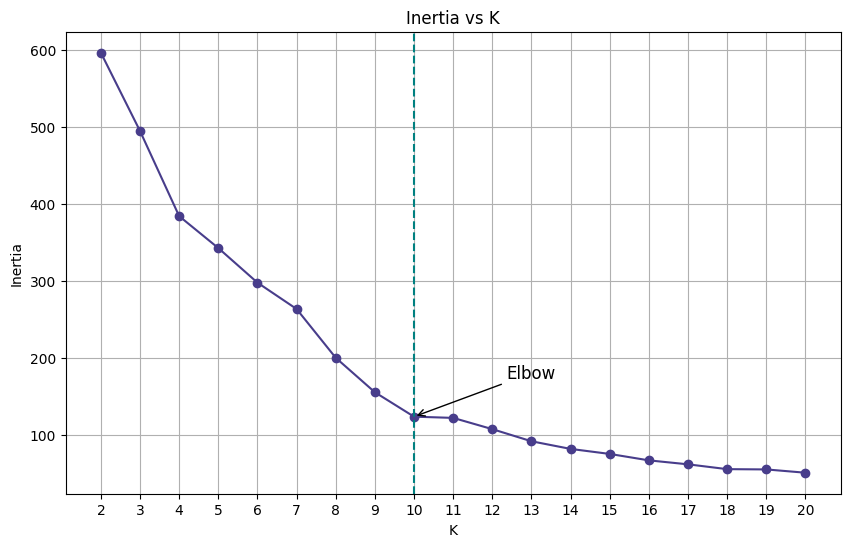

In [74]:
plt.figure(figsize=(10,6))
plt.plot(k_values,inertia,marker='o',color='#483D8B')
plt.title('Inertia vs K')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()

elbow_x = best_k
elbow_y = inertia[best_k -2]
plt.axvline(best_k, color='#008080', linestyle='--', label=f"Best k = {best_k}")
plt.annotate("Elbow",
             xy=(elbow_x, elbow_y),
             xytext=(elbow_x + 3, elbow_y+50),
             arrowprops=dict(facecolor='black', arrowstyle="->"),
             fontsize=12,
             ha='center')
plt.show()

In [75]:
kmeansP2=KMeans(n_clusters=best_k,random_state=42,init='k-means++')
kmeansP2.fit(X_train_pca)

KMeans(n_clusters=np.int64(10), random_state=42)

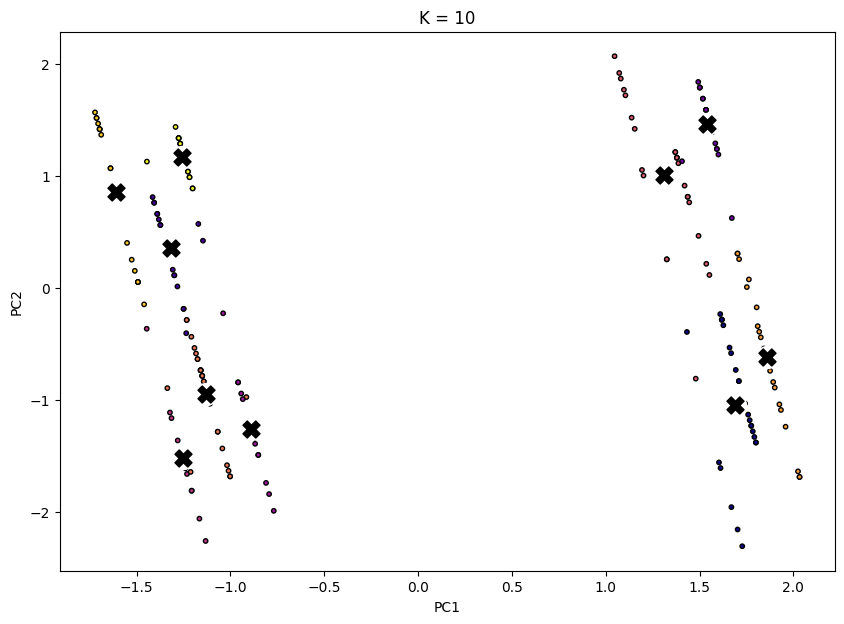

In [76]:
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
cmap = plt.get_cmap('plasma', 10)

grid = np.zeros((xx.ravel().shape[0], X_train_pca.shape[1]))
grid[:, 0] = xx.ravel()
grid[:, 1] = yy.ravel()

Z = kmeansP2.predict(grid).reshape(xx.shape)
fig,ax=plt.subplots(1,1,figsize=(10,7))
#ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.2)
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeansP2.labels_, cmap=cmap, s=10, edgecolor='k')
ax.scatter(kmeansP2.cluster_centers_[:, 0], kmeansP2.cluster_centers_[:, 1], c='white', marker='o', s=250)
ax.scatter(kmeansP2.cluster_centers_[:, 0], kmeansP2.cluster_centers_[:, 1], c='black', marker='X', s=150)
ax.set_title(f"K = {best_k}")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
#ax.grid()
plt.show()

In [77]:
best_k_pp = max(silhouette_scores, key=silhouette_scores.get)
print("Best k based on Silhouette Score = ",best_k_pp)

Best k based on Silhouette Score =  18


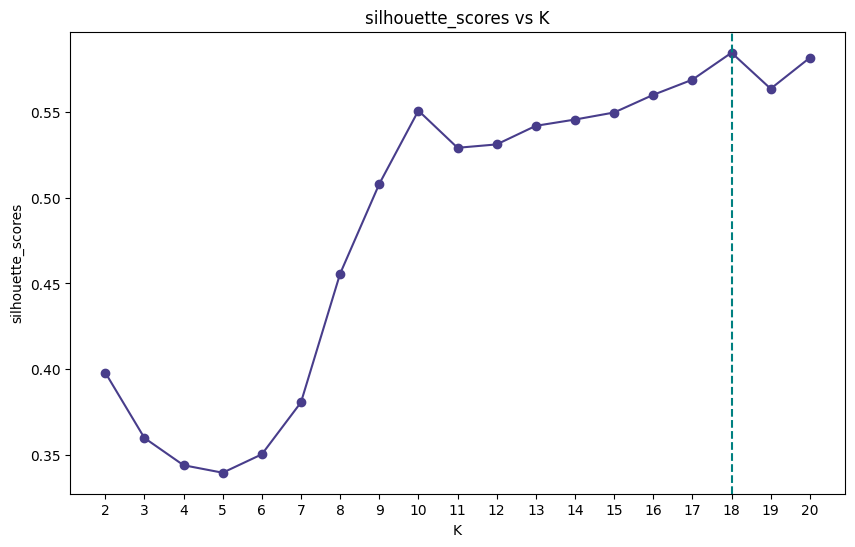

In [78]:
plt.figure(figsize=(10,6))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o',color='#483D8B')
plt.title('silhouette_scores vs K')
plt.xlabel('K')
plt.xticks(k_values)
plt.ylabel('silhouette_scores')
plt.axvline(best_k_pp, color='#008080', linestyle='--', label=f"Best k = {best_k}")
plt.show()

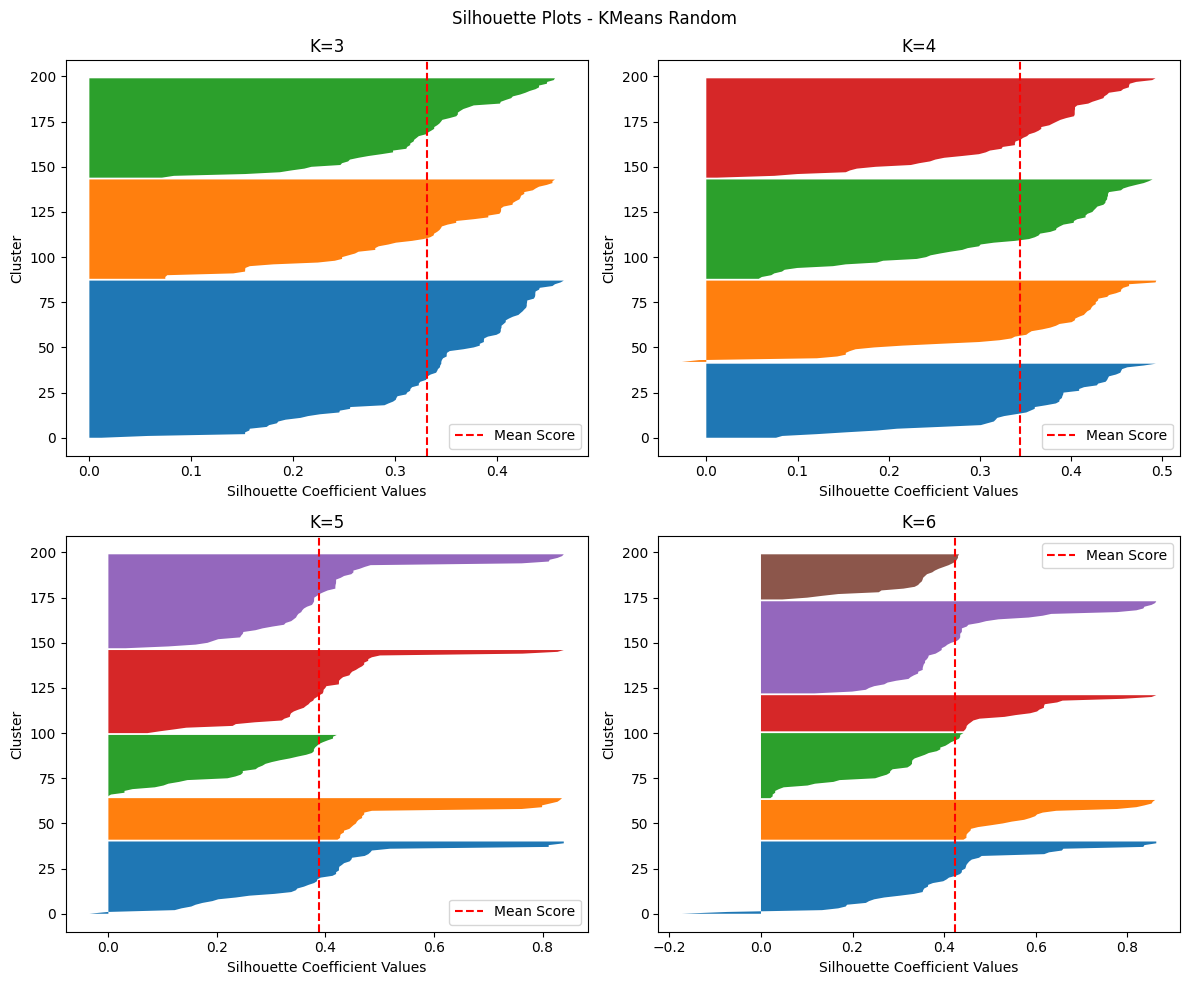

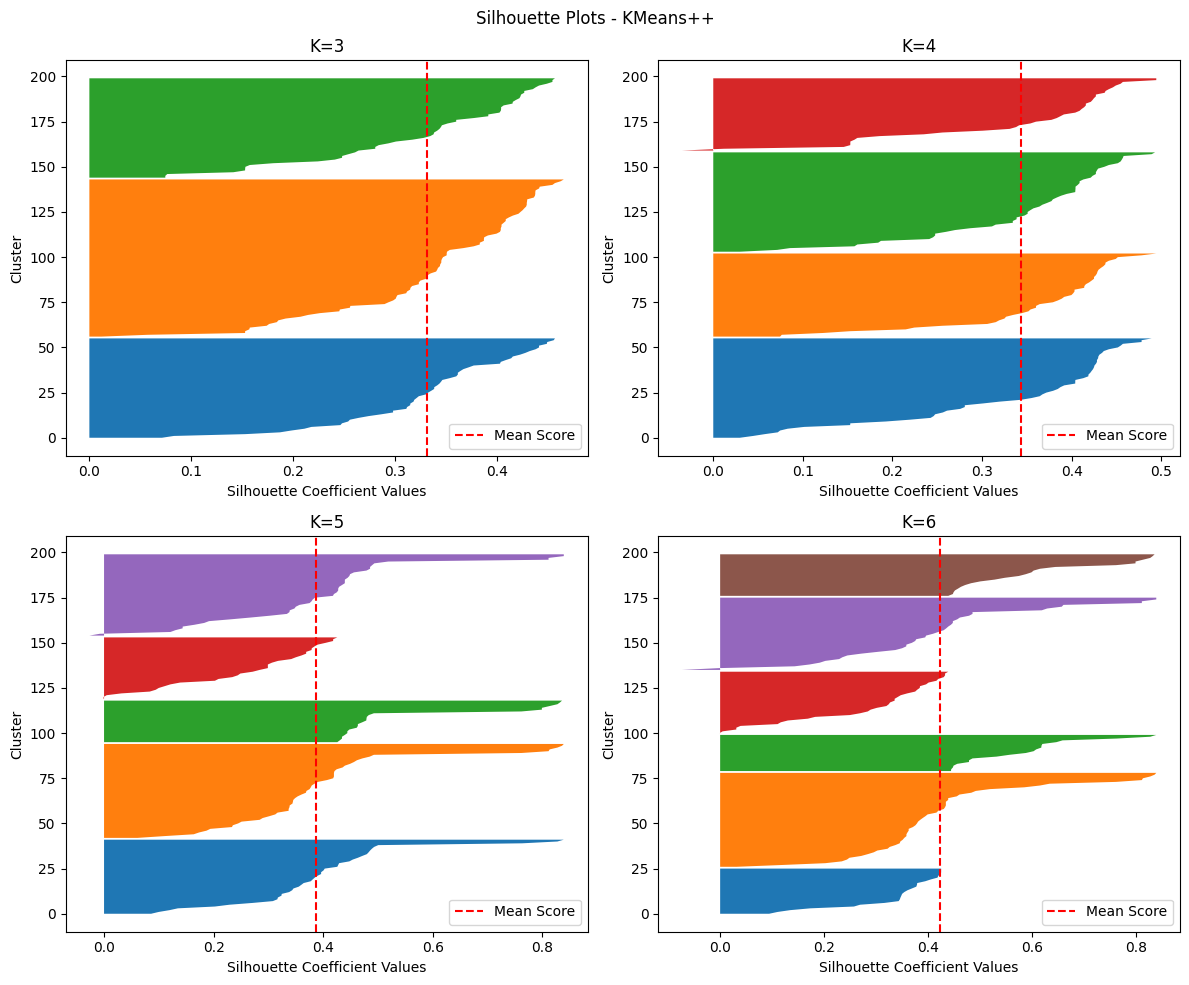

In [79]:
# Function to plot silhouette analysis
def plot_silhouette(ax, X, labels, title):
    silhouette_vals = silhouette_samples(X, labels)
    y_lower, y_upper = 0, 0
    sorted_silhouette_vals = np.sort(silhouette_vals)

    for i in range(len(np.unique(labels))):
        ith_cluster_silhouette_vals = sorted_silhouette_vals[labels == i]
        y_upper += len(ith_cluster_silhouette_vals)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals)
        y_lower = y_upper

    ax.axvline(np.mean(silhouette_vals), color="red", linestyle="--", label="Mean Score")
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster")
    ax.set_title(title)
    ax.legend()

# Range of K values to test
k_values = [3, 4, 5, 6]

# Create subplots for K-Means Random Initialization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Silhouette Plots - KMeans Random")

for ax, k in zip(axes.flatten(), k_values):
    kmeans = KMeans(n_clusters=k, init='random', random_state=7, n_init=10)
    kmeans_labels = kmeans.fit_predict(X_train_pca)
    plot_silhouette(ax, X_train_pca, kmeans_labels, f"K={k}")

plt.tight_layout()
plt.show()

# Create subplots for K-Means++ Initialization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Silhouette Plots - KMeans++")

for ax, k in zip(axes.flatten(), k_values):
    kmeans_plus = KMeans(n_clusters=k, init='k-means++', random_state=7, n_init=10)
    kmeans_plus_labels = kmeans_plus.fit_predict(X_train_pca)
    plot_silhouette(ax, X_train_pca, kmeans_plus_labels, f"K={k}")

plt.tight_layout()
plt.show()

**Silhouette Analysis Summary :**

This plot shows the Silhouette Coefficients for different values of **k** (number of clusters). Each subplot corresponds to a different value of `k`, and visualizes the silhouette score distribution across the clusters.

#### Key Observations:
- The **red dashed line** represents the **average silhouette score** for each `k`.
- A **higher average silhouette score** indicates better-defined clusters.
- When:
  - **k = 2 or 3**: Clusters appear more compact and separated.
  - **k = 5 and beyond**: Many clusters have silhouette scores near 0 or even negative, indicating overlapping or poorly separated clusters.
- **k = 3 to 5** may be reasonable choices for clustering, as they show a better balance between compactness and separation.

#### What is Silhouette Score?
It ranges from -1 to 1:
- Close to **1** → well-clustered, far from neighboring clusters.
- Close to **0** → on the border of two clusters.
- Close to **-1** → possibly assigned to the wrong cluster.

This analysis helps in choosing the **optimal `k`** by looking for the highest average silhouette score with consistently high individual cluster scores.


Compare standard KMeans and KMeans++:

In [80]:
SK_VS_KP=pd.DataFrame({'Metric':["Inertia", "Silhouette Score","Iterations","Execution Time"],
          'Standard KMeans':[model_1.inertia_,silhouette_score(X_train_pca, pridiction,random_state=42),model_1.n_iter_,execution_time],
          'KMeans Plus Plus':[model_2.inertia_,silhouette_score(X_train_pca, pridiction_P,random_state=42),model_2.n_iter_,execution_timeP]})
SK_VS_KP

Metric  Standard KMeans  KMeans Plus Plus
0           Inertia       596.396335        596.396335
1  Silhouette Score         0.397956          0.397956
2        Iterations         3.000000          3.000000
3    Execution Time         0.023207          0.008692

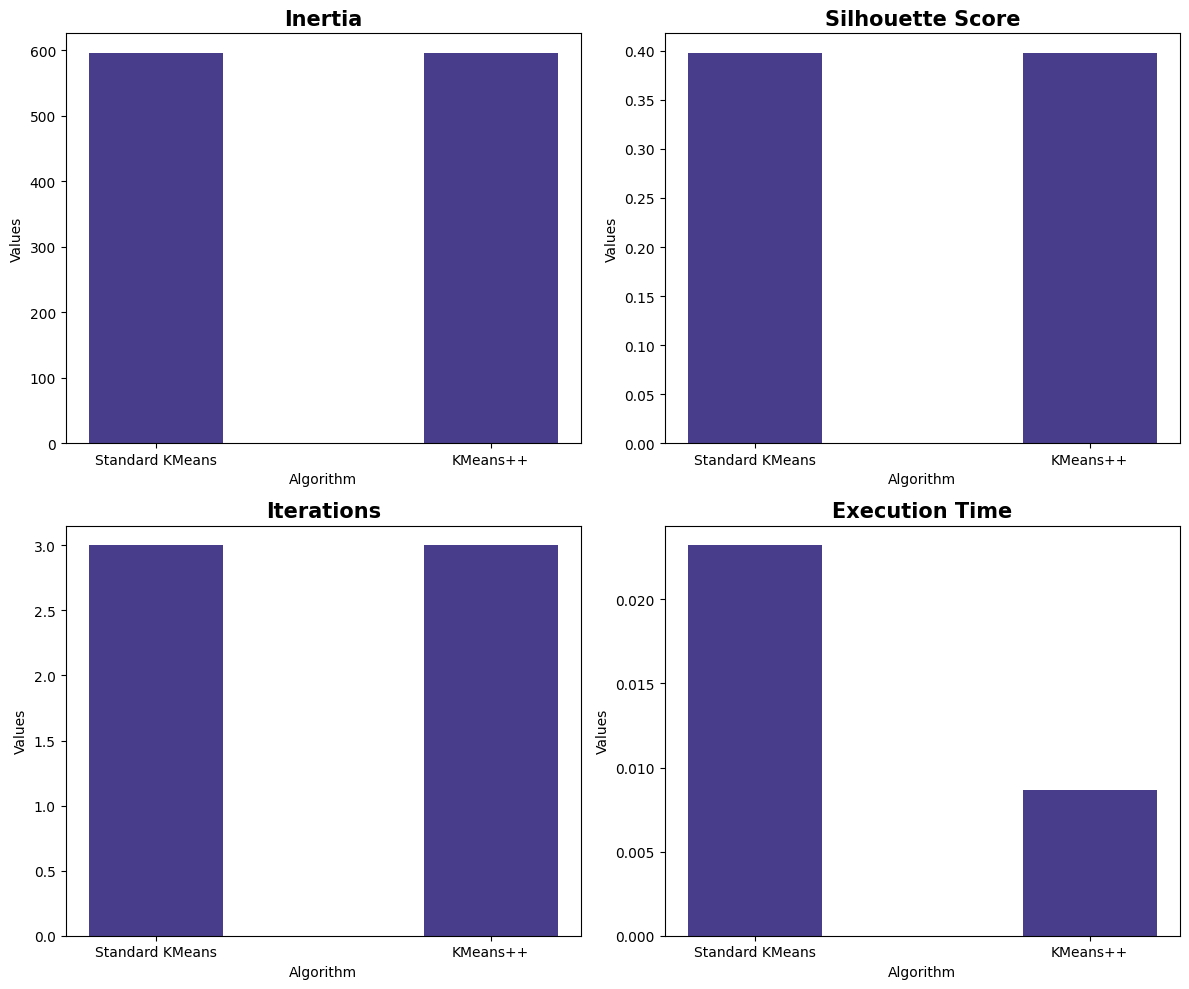

In [81]:
fig,ax=plt.subplots(2,2,figsize=(12,10))
metrics = SK_VS_KP["Metric"]
for i,ax in enumerate(ax.flatten()):
    metric= metrics[i]
    values= SK_VS_KP.loc[SK_VS_KP["Metric"] == metric].iloc[0, 1:]
    labels= ["Standard KMeans", "KMeans++"]
    ax.bar(labels, values, width=.4,color='#483D8B')
    ax.set_title(metric, fontsize=15, fontweight="bold")
    ax.set_ylabel("Values")
    ax.set_xlabel("Algorithm")
    ax.tick_params(axis="x")
    ax.tick_params(axis="y")
plt.tight_layout()
plt.show()

KMeans++ may take more iterations than the Standard KMean

But the Execution time for is lower than the standard KMean

KMeans++ generally converges in fewer iterations due to smarter initialization, but the initialization step is more computationally expensive. This can result in longer total runtime despite faster convergence.



1.  **Interia** :

  *  Standard KMeans:
      *   Higher inertia
      *   indicates less compact clusters
  
  *  KMeans++
      *  Lower inertia
      *   Produces more compact and better-formed clusters
  
  *   conclusion: KMeans++ preforms better in minimizing inertia

2.   **Silhouette Score**

  *   Standard KMeans:
      *   Lower sihouette score
      *   Clusters are less well separated

  *   KMeans++:

      *   Higher silhouette score
      *   Clusters are more distinct and clearly separated
  
  *   Conclusion: KMeans++ results in higher cluster quality

3.   **Iterations to Converge**
  
  *   Standard KMeans:

      *   Fewer iterations

  *   KMeans++:

      *   Slightly more iterations

  *   Conclusion: Standard KMeans converges faster in steps, but not necessarily to a better solution
4.   Execution Time

  *   Standard KMeans:

      *   Slightly slower

  *   KMeans++:

      *   Slightly faster

  *   Conclusion: KMeans++ is marginally more efficient in runtime













In [82]:
exp=15
comparisonss=[]
Comparisons={
    "Random State":[],
    "Inertia":[],
    "Silhouette Score":[],
    "Iterations":[],
    "Execution Time":[]
}
for i in range(exp):
    random_state = np.random.randint(0, 10000)
    Stime= time.time()
    kmeanspp= KMeans(n_clusters=2, init="k-means++", random_state=random_state)
    clusterspp= kmeanspp.fit_predict(X_train_pca)
    Etime= time.time()
    Comparisons["Random State"].append(random_state)
    Comparisons["Inertia"].append(kmeanspp.inertia_)
    Comparisons["Silhouette Score"].append(silhouette_score(X_train_pca, clusterspp, sample_size=50, random_state=42))
    Comparisons["Iterations"].append(kmeanspp.n_iter_)
    Comparisons["Execution Time"].append(Etime - Stime)


final_comparisons = pd.DataFrame(Comparisons)
final_comparisons

Random State     Inertia  Silhouette Score  Iterations  Execution Time
0           3394  596.396335          0.402273           3        0.004385
1           8319  596.396335          0.402273           4        0.001920
2           1816  596.396335          0.402273           3        0.001696
3           5854  596.396335          0.402273           8        0.001971
4           6709  596.396335          0.402273           3        0.001675
5            569  596.396335          0.402273           3        0.001659
6           5442  596.396335          0.402273           3        0.001705
7           1895  596.396335          0.402273           3        0.001615
8           2733  596.396335          0.402273           3        0.001674
9           3863  596.396335          0.402273           3        0.001663
10          7455  596.396335          0.402273           3        0.001675
11          4014  596.396335          0.402273           3        0.001682
12          1686  596.396335          0.402273           9        0.001954
13          3009  596.396335          0.402273           3        0.001663
14          7806  596.396335          0.402273           3        0.001607

Comparing clustering performance with and without dimensioality reduction(PCA)

1-with dimensioality reduction(PCA)

In [83]:
Kmeansp_pca=KMeans(n_clusters=2,random_state=42,init='k-means++')
clustesppc=Kmeansp_pca.fit(X_train_pca)

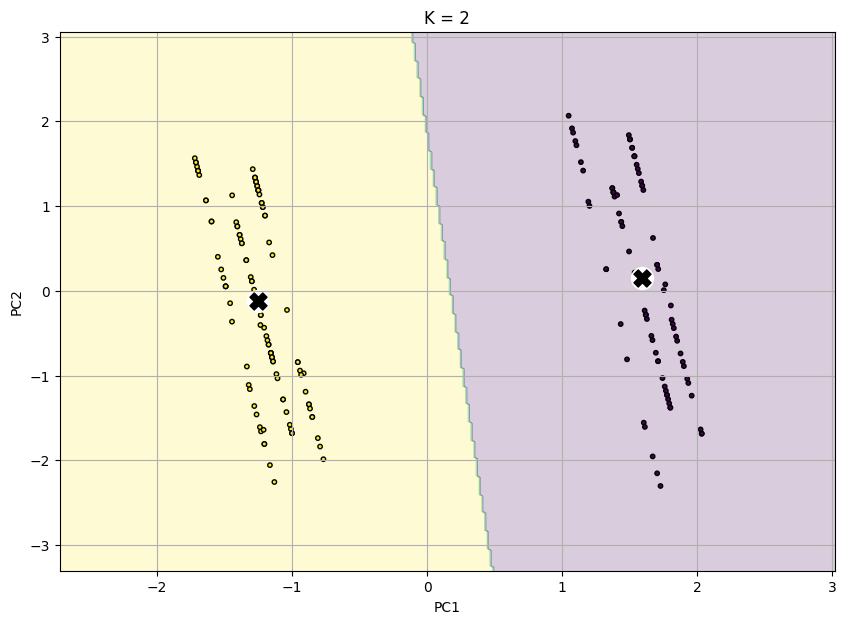

In [84]:
h = 0.02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
cmap = plt.get_cmap('viridis', 5)

grid = np.zeros((xx.ravel().shape[0], X_train_pca.shape[1]))
grid[:, 0] = xx.ravel()
grid[:, 1] = yy.ravel()

Z = Kmeansp_pca.predict(grid).reshape(xx.shape)
fig,ax=plt.subplots(1,1,figsize=(10,7))
ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.2)
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Kmeansp_pca.labels_, cmap=cmap, s=10, edgecolor='k')
ax.scatter(Kmeansp_pca.cluster_centers_[:, 0], Kmeansp_pca.cluster_centers_[:, 1], c='white', marker='o', s=250)
ax.scatter(Kmeansp_pca.cluster_centers_[:, 0], Kmeansp_pca.cluster_centers_[:, 1], c='black', marker='X', s=150)
ax.set_title("K = 2")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.grid()
plt.show()

In [85]:
print("Inertia Value: ",Kmeansp_pca.inertia_)
print("Silhouette Score:",silhouette_score(X_train_pca,clusterspp,random_state=42))

Inertia Value:  596.3963346493065
Silhouette Score: 0.39795645599174007


2-without dimensioality reduction(PCA)

In [86]:
kmeans_ppp=KMeans(n_clusters=2,random_state=42,init='k-means++')
clusterss=kmeans_ppp.fit(X_scaled)
kpp=kmeans_ppp.predict(X_scaled)


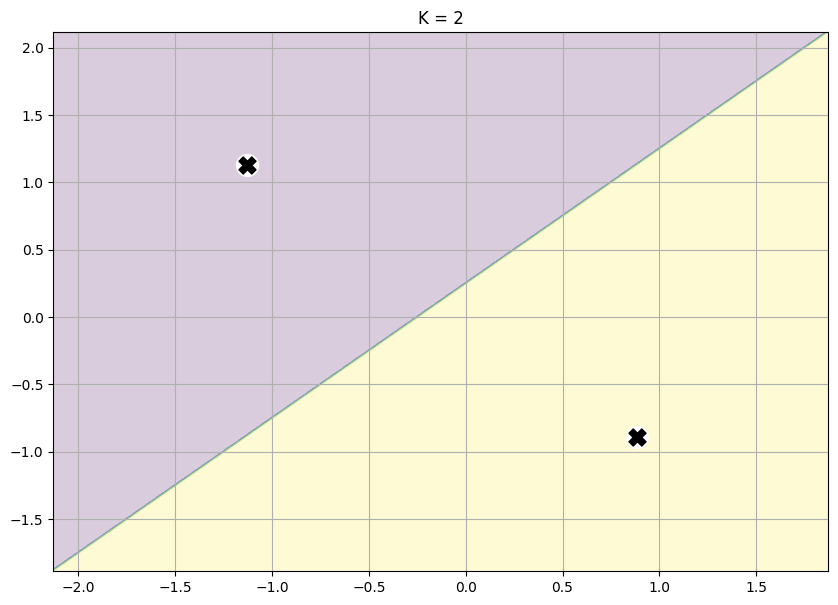

In [87]:
h = 0.02
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
cmap = plt.get_cmap('viridis', 5)

grid = np.zeros((xx.ravel().shape[0], X_scaled.shape[1]))
grid[:, 0] = xx.ravel()
grid[:, 1] = yy.ravel()

Z = kmeans_ppp.predict(grid).reshape(xx.shape)
fig,ax=plt.subplots(1,1,figsize=(10,7))
ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.2)
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_ppp.labels_, cmap=cmap, s=50, edgecolor='k', alpha = 0.8)
ax.scatter(kmeans_ppp.cluster_centers_[:, 0], kmeans_ppp.cluster_centers_[:, 1], c='white', marker='o', s=250)
ax.scatter(kmeans_ppp.cluster_centers_[:, 0], kmeans_ppp.cluster_centers_[:, 1], c='black', marker='X', s=150)
ax.set_title("K = 2")
ax.grid()
plt.show()

In [88]:
print("Inertia Value: ",kmeans_ppp.inertia_)
print("Silhouette Score:",silhouette_score(X_scaled,kpp,random_state=42))

Inertia Value:  596.3963346493064
Silhouette Score: 0.39795645599312235


**Compare clustering in full space vs. reduced 2D space:**

In [89]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [90]:
kmeanspca2= KMeans(n_clusters=2, init='k-means++', random_state=42)
clusterspca= kmeanspca2.fit_predict(X_pca)

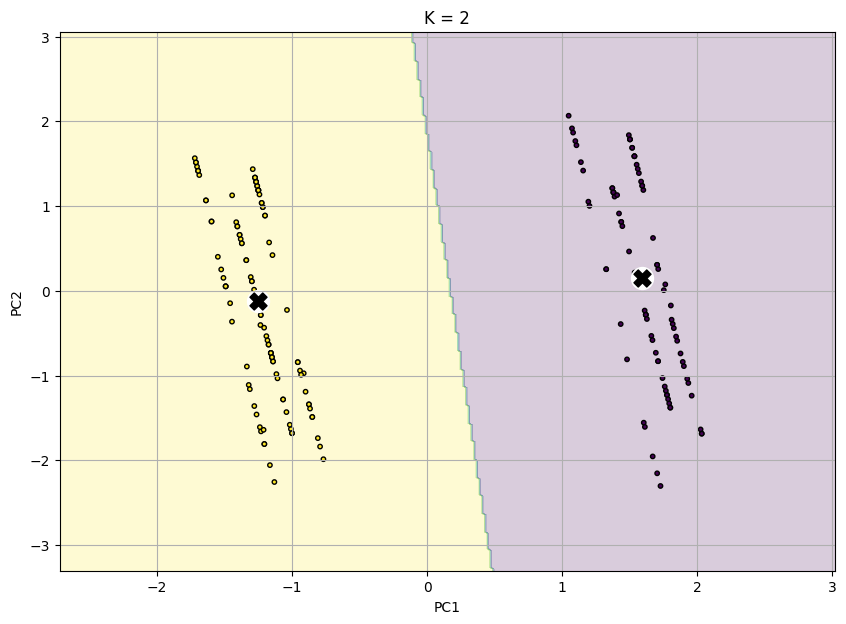

In [91]:
h = 0.02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
cmap = plt.get_cmap('viridis', 5)

grid = np.zeros((xx.ravel().shape[0], X_pca.shape[1]))
grid[:, 0] = xx.ravel()
grid[:, 1] = yy.ravel()

Z = kmeanspca2.predict(grid).reshape(xx.shape)
fig,ax=plt.subplots(1,1,figsize=(10,7))
ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.2)
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeanspca2.labels_, cmap=cmap, s=10, edgecolor='k')
ax.scatter(kmeanspca2.cluster_centers_[:, 0], kmeanspca2.cluster_centers_[:, 1], c='white', marker='o', s=250)
ax.scatter(kmeanspca2.cluster_centers_[:, 0], kmeanspca2.cluster_centers_[:, 1], c='black', marker='X', s=150)
ax.set_title("K = 2")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.grid()
plt.show()

In [92]:
print("Inertia Value: ",kmeanspca2.inertia_)
print("Silhouette Score:",silhouette_score(X_pca,clusterspca,random_state=42))

Inertia Value:  271.9939689530689
Silhouette Score: 0.5813243541018003


 **3.Mini-Batch K-Means:**

In [93]:
cu_mem,start_time=track_memory()
min_batch=MiniBatchKMeans(n_clusters=2,random_state=42,init="random")
min_batch.fit(X_train_pca)
memory_used_m,execution_time_m=print_memory_usage(cu_mem,start_time,'min_batch')
print("Execution Time:",execution_time)
print("Memory Usage in MB:",memory_used)
train_clusters=min_batch.predict(X_train_pca)

Execution Time: 0.023207426071166992
Memory Usage in MB: 400.83984375


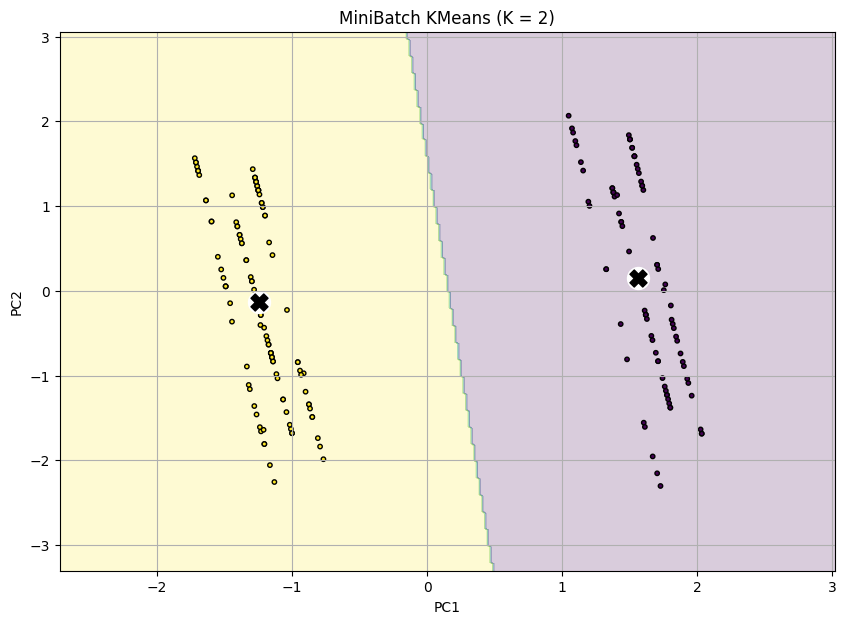

In [94]:
h = 0.02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
cmap = plt.get_cmap('viridis', 5)

grid = np.zeros((xx.ravel().shape[0], X_train_pca.shape[1]))
grid[:, 0] = xx.ravel()
grid[:, 1] = yy.ravel()

Z = min_batch.predict(grid).reshape(xx.shape)
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.2)
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=train_clusters, cmap=cmap, s=10, edgecolor='k')
ax.scatter(min_batch.cluster_centers_[:, 0], min_batch.cluster_centers_[:, 1], c='white', marker='o', s=250)
ax.scatter(min_batch.cluster_centers_[:, 0], min_batch.cluster_centers_[:, 1], c='black', marker='X', s=150)
ax.set_title("MiniBatch KMeans (K = 2)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.grid()
plt.show()

In [95]:
cluster_range = range(2,21)
inertia=[]
silhouette_scores=[]
models2={}

for k in cluster_range:
  min_batch=MiniBatchKMeans(n_clusters=k,random_state=42)
  min_batch.fit(X_train_pca)
  inertia.append(min_batch.inertia_)
  silhouette_scores.append(silhouette_score(X_train_pca,min_batch.labels_,random_state=42))
  models2[k]=min_batch

#aims to find the best k
kl = KneeLocator(cluster_range, inertia, curve="convex", direction="decreasing")
best_k = kl.elbow
print("Best k (Elbow Point) = ",best_k)

Best k (Elbow Point) =  8


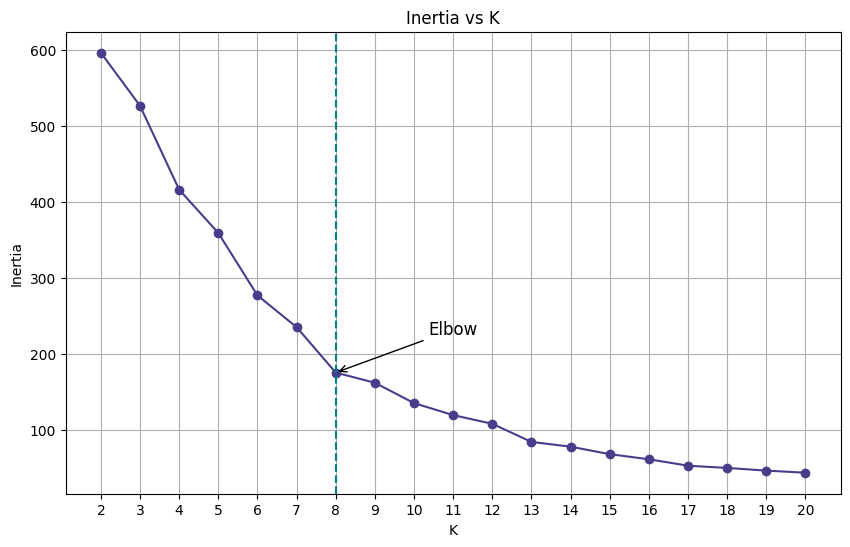

In [96]:
plt.figure(figsize=(10,6))
plt.plot(cluster_range,inertia,marker='o',color='#483D8B')
plt.title('Inertia vs K')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid()
elbow_x = best_k
elbow_y = inertia[best_k -2]
plt.axvline(best_k, color='#008080', linestyle='--', label=f"Best k = {best_k}")
plt.annotate("Elbow",
             xy=(elbow_x, elbow_y),
             xytext=(elbow_x + 3, elbow_y+50),
             arrowprops=dict(facecolor='black', arrowstyle="->"),
             fontsize=12,
             ha='center')
plt.show()

In [97]:
best_k_silhouette = cluster_range[np.argmax(silhouette_scores)]
print("Best k based on Silhouette Score = ", best_k_silhouette)

Best k based on Silhouette Score =  19


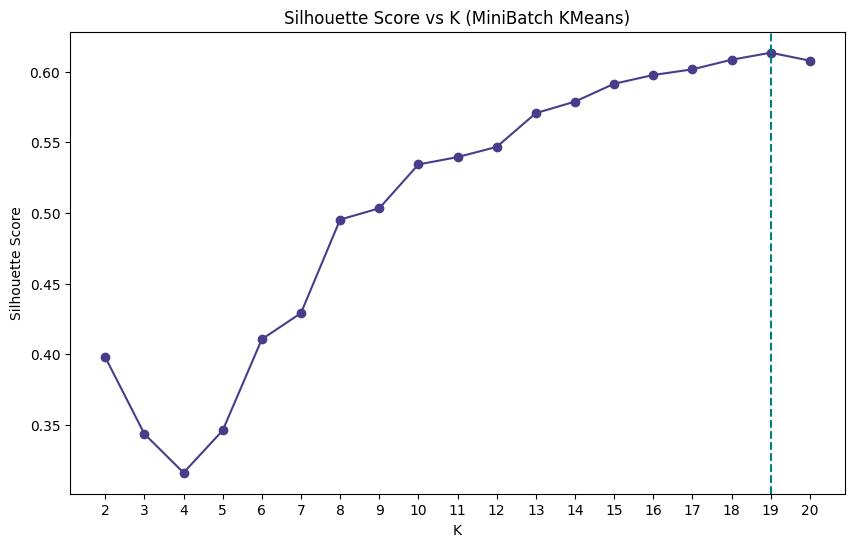

In [98]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', color='#483D8B')
plt.title('Silhouette Score vs K (MiniBatch KMeans)')
plt.xlabel('K')
plt.xticks(cluster_range)
plt.ylabel('Silhouette Score')
plt.axvline(best_k_silhouette, color='#008080', linestyle='--', label=f"Best k = {best_k_silhouette}")
plt.show()


In [99]:
best_k_mini = best_k_silhouette
best_k_mini

19

In [100]:
mini_batch_best = MiniBatchKMeans(n_clusters=best_k_mini,random_state=42,init="random")
train_cluster = mini_batch_best.fit_predict(X_pca)

kmeanspp_best = KMeans(n_clusters=best_k_pp,random_state=4,init='k-means++')
pridiction_P = kmeanspp_best.fit_predict(X_pca)

Kmeans_best = KMeans(n_clusters=best_k_standard,random_state=0,init='random')
prediction = Kmeans_best.fit_predict(X_train_pca)

**Compare Standard KMeans and KMeans++ and Mini Batch Kmeans with each the nummber of clusters that we got from the silhouettte score for each model.**

In [101]:
MB_VS_KP_VS_SK=pd.DataFrame({'Metric':["Inertia", "Silhouette Score","Iterations","Execution Time","Memory Usage"],
          'Standard KMeans':[Kmeans_best.inertia_,silhouette_score(X_train_pca, pridiction,random_state=42),Kmeans_best.n_iter_,execution_time,memory_used],
          'MiniBatch KMeans':[mini_batch_best.inertia_,silhouette_score(X_train_pca, train_clusters,random_state=42),mini_batch_best.n_iter_,execution_time_m,memory_used_m],
          'KMeans plus plus ':[kmeanspp_best.inertia_,silhouette_score(X_train_pca, pridiction_P,random_state=42),kmeanspp_best.n_iter_,execution_timeP,memory_usedP]})
MB_VS_KP_VS_SK

Metric  Standard KMeans  MiniBatch KMeans  KMeans plus plus 
0           Inertia        54.323179          6.982220           6.384058
1  Silhouette Score         0.397956          0.397956           0.171005
2        Iterations         6.000000         24.000000           6.000000
3    Execution Time         0.023207          0.006341           0.008692
4      Memory Usage       400.839844        478.398438         435.226562

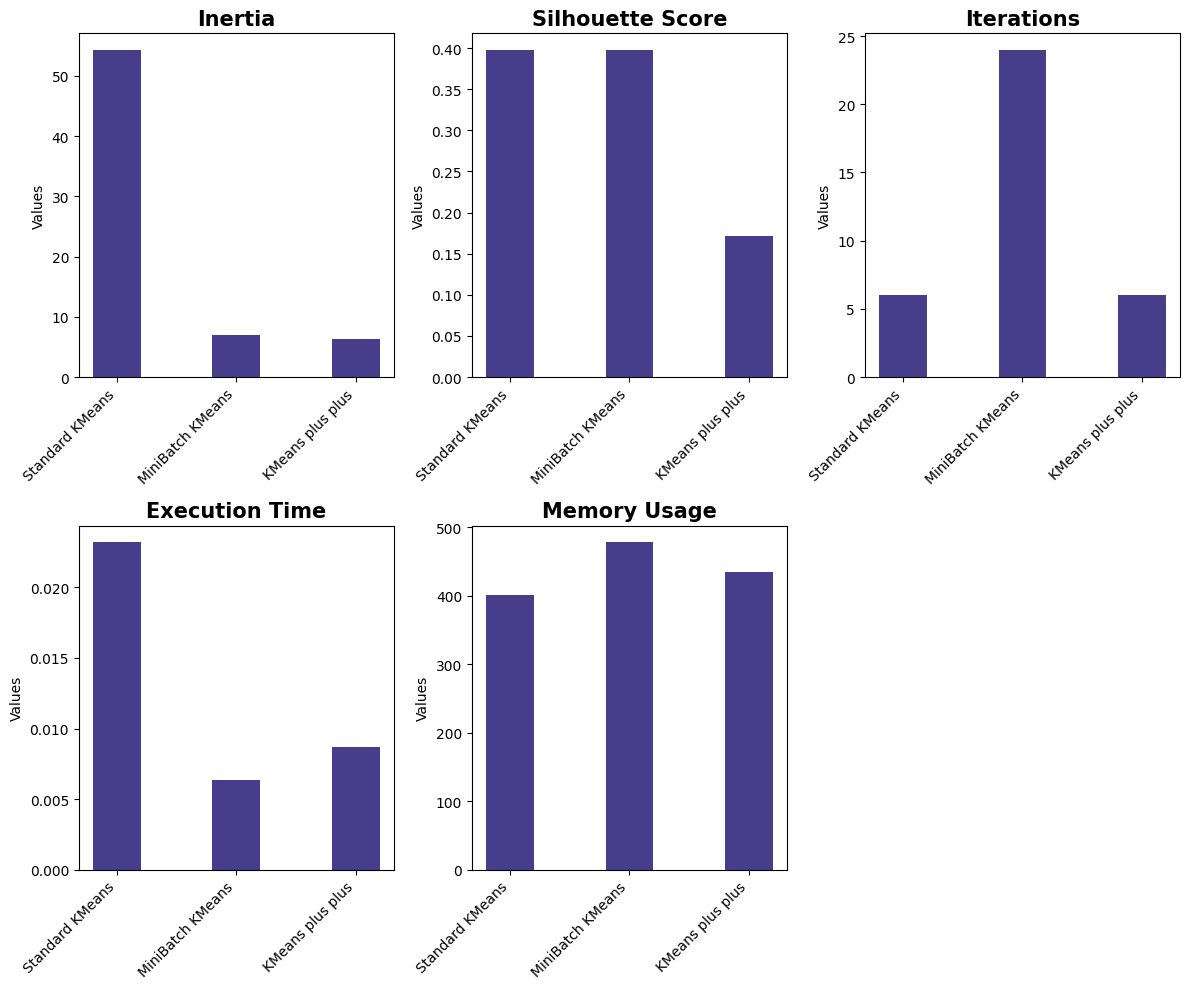

In [102]:
fig,ax=plt.subplots(2,3,figsize=(12,10))
metrics = MB_VS_KP_VS_SK["Metric"]
for i,ax in enumerate(ax.flatten()):
    if i < len(metrics):
      metric= metrics[i]
      values= MB_VS_KP_VS_SK.loc[MB_VS_KP_VS_SK["Metric"] == metric].iloc[0, 1:]
      labels= ["Standard KMeans", "MiniBatch KMeans","KMeans plus plus"]
      ax.bar(labels,values,width=.4,color='#483D8B')
      ax.set_title(metric, fontsize=15, fontweight="bold")
      ax.set_ylabel("Values")
      ax.tick_params(axis="y")
      ax.set_xticks([0, 1, 2])
      ax.set_xticklabels(labels, rotation=45, ha="right")
    else :
      ax.axis("off")
plt.tight_layout()
plt.show()

1.   **inertia**:   
    *   Standard KMeans:
      *   Higher inertia , indicates less compact clusters
    *   Kmeans++:
      *   Lower inertia than standard KMeans , produces more compact and better-formed clusters
    *   Mini-Batch KMeans:
      *   The lowest among all three , produces better formed clustes
    *   Conclusion: Mini-Batch KMeans preformes better in minimizing inirtia ,this doesn't mean it's the best
2.   **Iterations**
    
    *   Standard KMeans:
      *   List item

*   List item
*   List item


*   List item


*   List item











In [103]:
mini_tsne=MiniBatchKMeans(n_clusters=2,random_state=42,init="random")
mini_tsne.fit(X_train_tsne)
train_clusters_tsne=mini_tsne.predict(X_train_tsne)

In [104]:
inertia_mini_tsne=mini_tsne.inertia_
silhouette_mini_tsne=silhouette_score(X_train_tsne,train_clusters_tsne,random_state=42)
print("Inertia Value: ",inertia_mini_tsne)
print("Silhouette Score:",silhouette_mini_tsne)

Inertia Value:  9257.30859375
Silhouette Score: 0.6474353


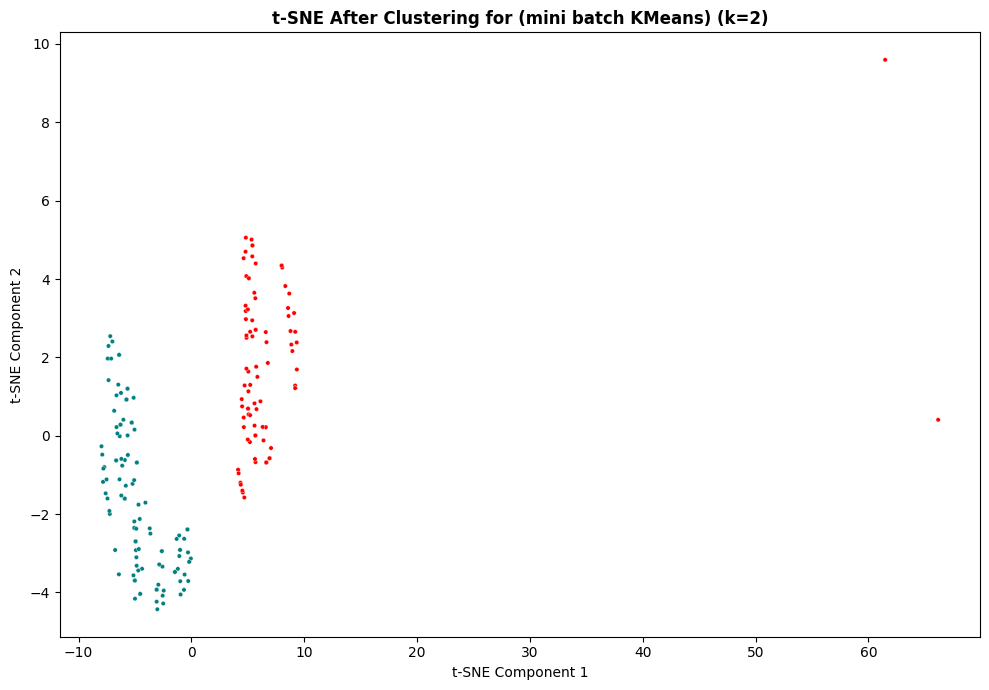

In [105]:
plt.figure(figsize=(10,7))
label=train_clusters_tsne
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=label, palette=['red','#008080'], s=10, legend=None)
plt.title(f"t-SNE After Clustering for (mini batch KMeans) (k={2})",  fontweight="bold")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.tight_layout()
plt.show()

In [106]:
mini_full=MiniBatchKMeans(n_clusters=best_k_mini,random_state=42,init="random")
mini_full.fit(X_scaled)
train_clusters_full=mini_full.predict(X_scaled)

In [107]:
inertia_scaled = mini_full.inertia_
silhouette_scaled = silhouette_score(X_scaled, train_clusters_full, random_state=42)
print("Inertia Value: ",inertia_scaled)
print("Silhouette Score:",silhouette_scaled)

Inertia Value:  116.1246777511626
Silhouette Score: 0.5088230366102716


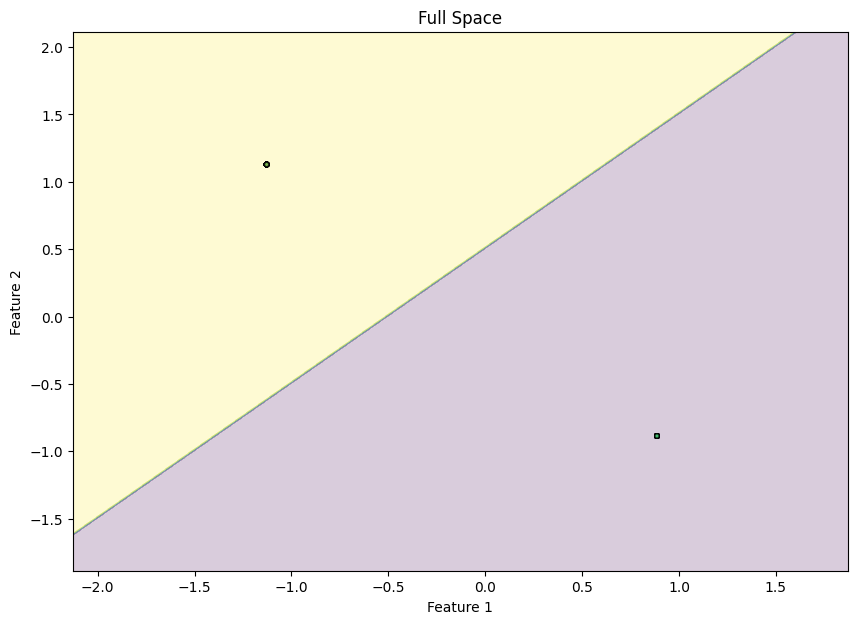

In [108]:
h=0.02
x_min,x_max=X_scaled[:,0].min()-1,X_scaled[:,0].max()+1
y_min,y_max=X_scaled[:,1].min()-1,X_scaled[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                  np.arange(y_min,y_max,h))
grid=np.zeros((xx.ravel().shape[0],X_scaled.shape[1]))
grid[:,0]=xx.ravel()
grid[:,1]=yy.ravel()
cmap=plt.get_cmap('viridis',5)
plt.figure(figsize=(10,7))
Z=mini_full.predict(grid).reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=cmap,alpha=0.2)
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=train_clusters_full,cmap='viridis',s=10,edgecolor='k',alpha=0.7)
plt.title("Full Space")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

**Compare clustering in full space vs. reduced 2D space:**

In [109]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [110]:
min_batch=MiniBatchKMeans(n_clusters=best_k_mini,random_state=42,init="random")
clusterspca= min_batch.fit_predict(X_pca)

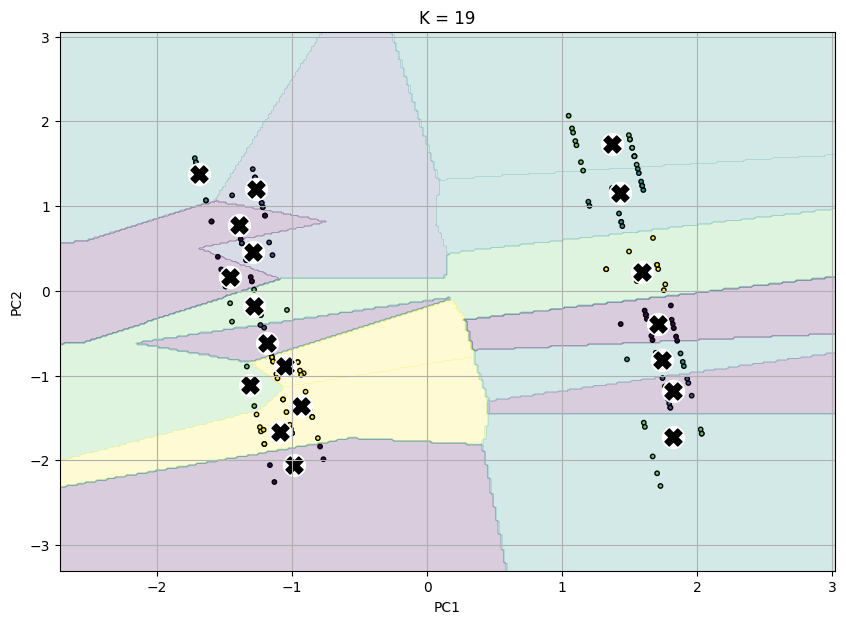

In [111]:
h = 0.02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
cmap = plt.get_cmap('viridis', 5)

grid = np.zeros((xx.ravel().shape[0], X_pca.shape[1]))
grid[:, 0] = xx.ravel()
grid[:, 1] = yy.ravel()

Z = min_batch.predict(grid).reshape(xx.shape)
fig,ax=plt.subplots(1,1,figsize=(10,7))
ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.2)
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=min_batch.labels_, cmap=cmap, s=10, edgecolor='k')
ax.scatter(min_batch.cluster_centers_[:, 0], min_batch.cluster_centers_[:, 1], c='white', marker='o', s=250)
ax.scatter(min_batch.cluster_centers_[:, 0], min_batch.cluster_centers_[:, 1], c='black', marker='X', s=150)
ax.set_title(f"K = {best_k_mini}")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.grid()
plt.show()

In [112]:
print("Inertia Value: ",min_batch.inertia_)
print("Silhouette Score:",silhouette_score(X_pca,clusterspca,random_state=42))

Inertia Value:  6.982220267184446
Silhouette Score: 0.4431212557204981


# **DBSCAN**

In [113]:
dbscan_1=DBSCAN()
y_pred=dbscan_1.fit_predict(X_train_pca)
y_pred

array([-1,  0, -1,  1,  2,  1,  3,  1, -1,  1, -1,  1, -1,  1, -1,  0,  2,
       -1, -1,  1, -1,  0,  3,  0,  3,  0,  3, -1,  3,  1, -1,  1, -1,  0,
        3,  1,  3,  1,  3,  1, -1,  0, -1,  2,  3,  2, -1,  2,  2,  2,  4,
        6,  4,  5,  4,  5,  4,  5,  4,  5,  5,  6,  4,  4,  5,  6,  4,  4,
        6,  4,  5,  4,  4,  4,  5,  6,  4, -1,  4,  4,  5, -1,  5,  4,  4,
        5,  4,  4,  4,  4,  4,  6,  5,  4,  4,  6,  4,  4,  5,  6,  4,  4,
        5,  6,  5,  4,  4,  5,  5,  5,  5,  4,  4,  6,  4,  4,  4,  4,  4,
        4,  6,  4,  4, -1, -1, -1, -1,  7, -1,  7,  8,  7, -1,  9, -1,  9,
       10,  7, -1,  9, 10,  7, -1,  9, -1,  7, -1,  9, 10,  7,  8,  7, 10,
        9, 10,  9,  8,  9,  8,  9, -1,  9, -1,  9,  8,  9,  8,  9, 10, -1,
        8,  7,  8,  7, 10,  9, -1,  7, -1,  7, 10,  9,  8,  9, -1,  7, 10,
        7, 10,  9, 10,  9,  8,  9, 10,  9, 10,  7,  8,  7])

In [114]:
noise_points=X_train_pca[dbscan_1.labels_==-1]
print("Number of Noise Points: ",len(noise_points))
cluster_points=X_train_pca[dbscan_1.labels_!=-1]
print("Number of Cluster Points: ",len(cluster_points))
print("Number of Cluster ",len(set(dbscan_1.labels_)))
print("percentage of noise points =",(len(noise_points)/len(X_train_pca))*100)

Number of Noise Points:  34
Number of Cluster Points:  166
Number of Cluster  12
percentage of noise points = 17.0


In [115]:
# noise_points=X_train_pca[y_pred==-1]
# print("Number of Noise Points: ",len(noise_points))
# cluster_points=X_train_pca[y_pred!=-1]
# print("Number of Cluster Points: ",len(cluster_points))
# print("Number of Cluster ",len(set(y_pred)))
# print("percentage of noise points =",(len(noise_points)/len(X_train_pca))*100)

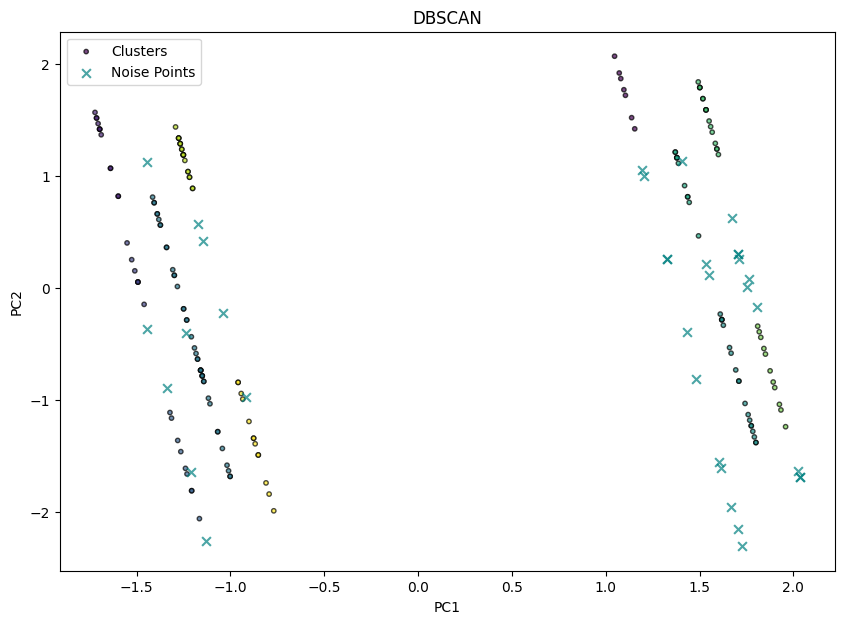

In [116]:
plt.figure(figsize=(10,7))
plt.scatter(cluster_points[:,0],cluster_points[:,1],c=y_pred[y_pred!=-1],s=10,edgecolor='k',alpha=0.7,label='Clusters')
plt.scatter(noise_points[:,0],noise_points[:,1],marker='x',c='#008080',s=40,alpha=0.7,label='Noise Points')
plt.title("DBSCAN")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

We applied DBSCAN using the default hyperparameters values , but the result showed that more than 50% of the data points considered outliers . This happened because the default parameter settings were not well-suited for our dataset so now we need to apply the hyperparameter tuning

**Tune eps and min_samples**

**eps** : The maximum distance between two samples to be considered neighbors(radius)

**min_samples**: The number of points required to form a dense region (a core point)


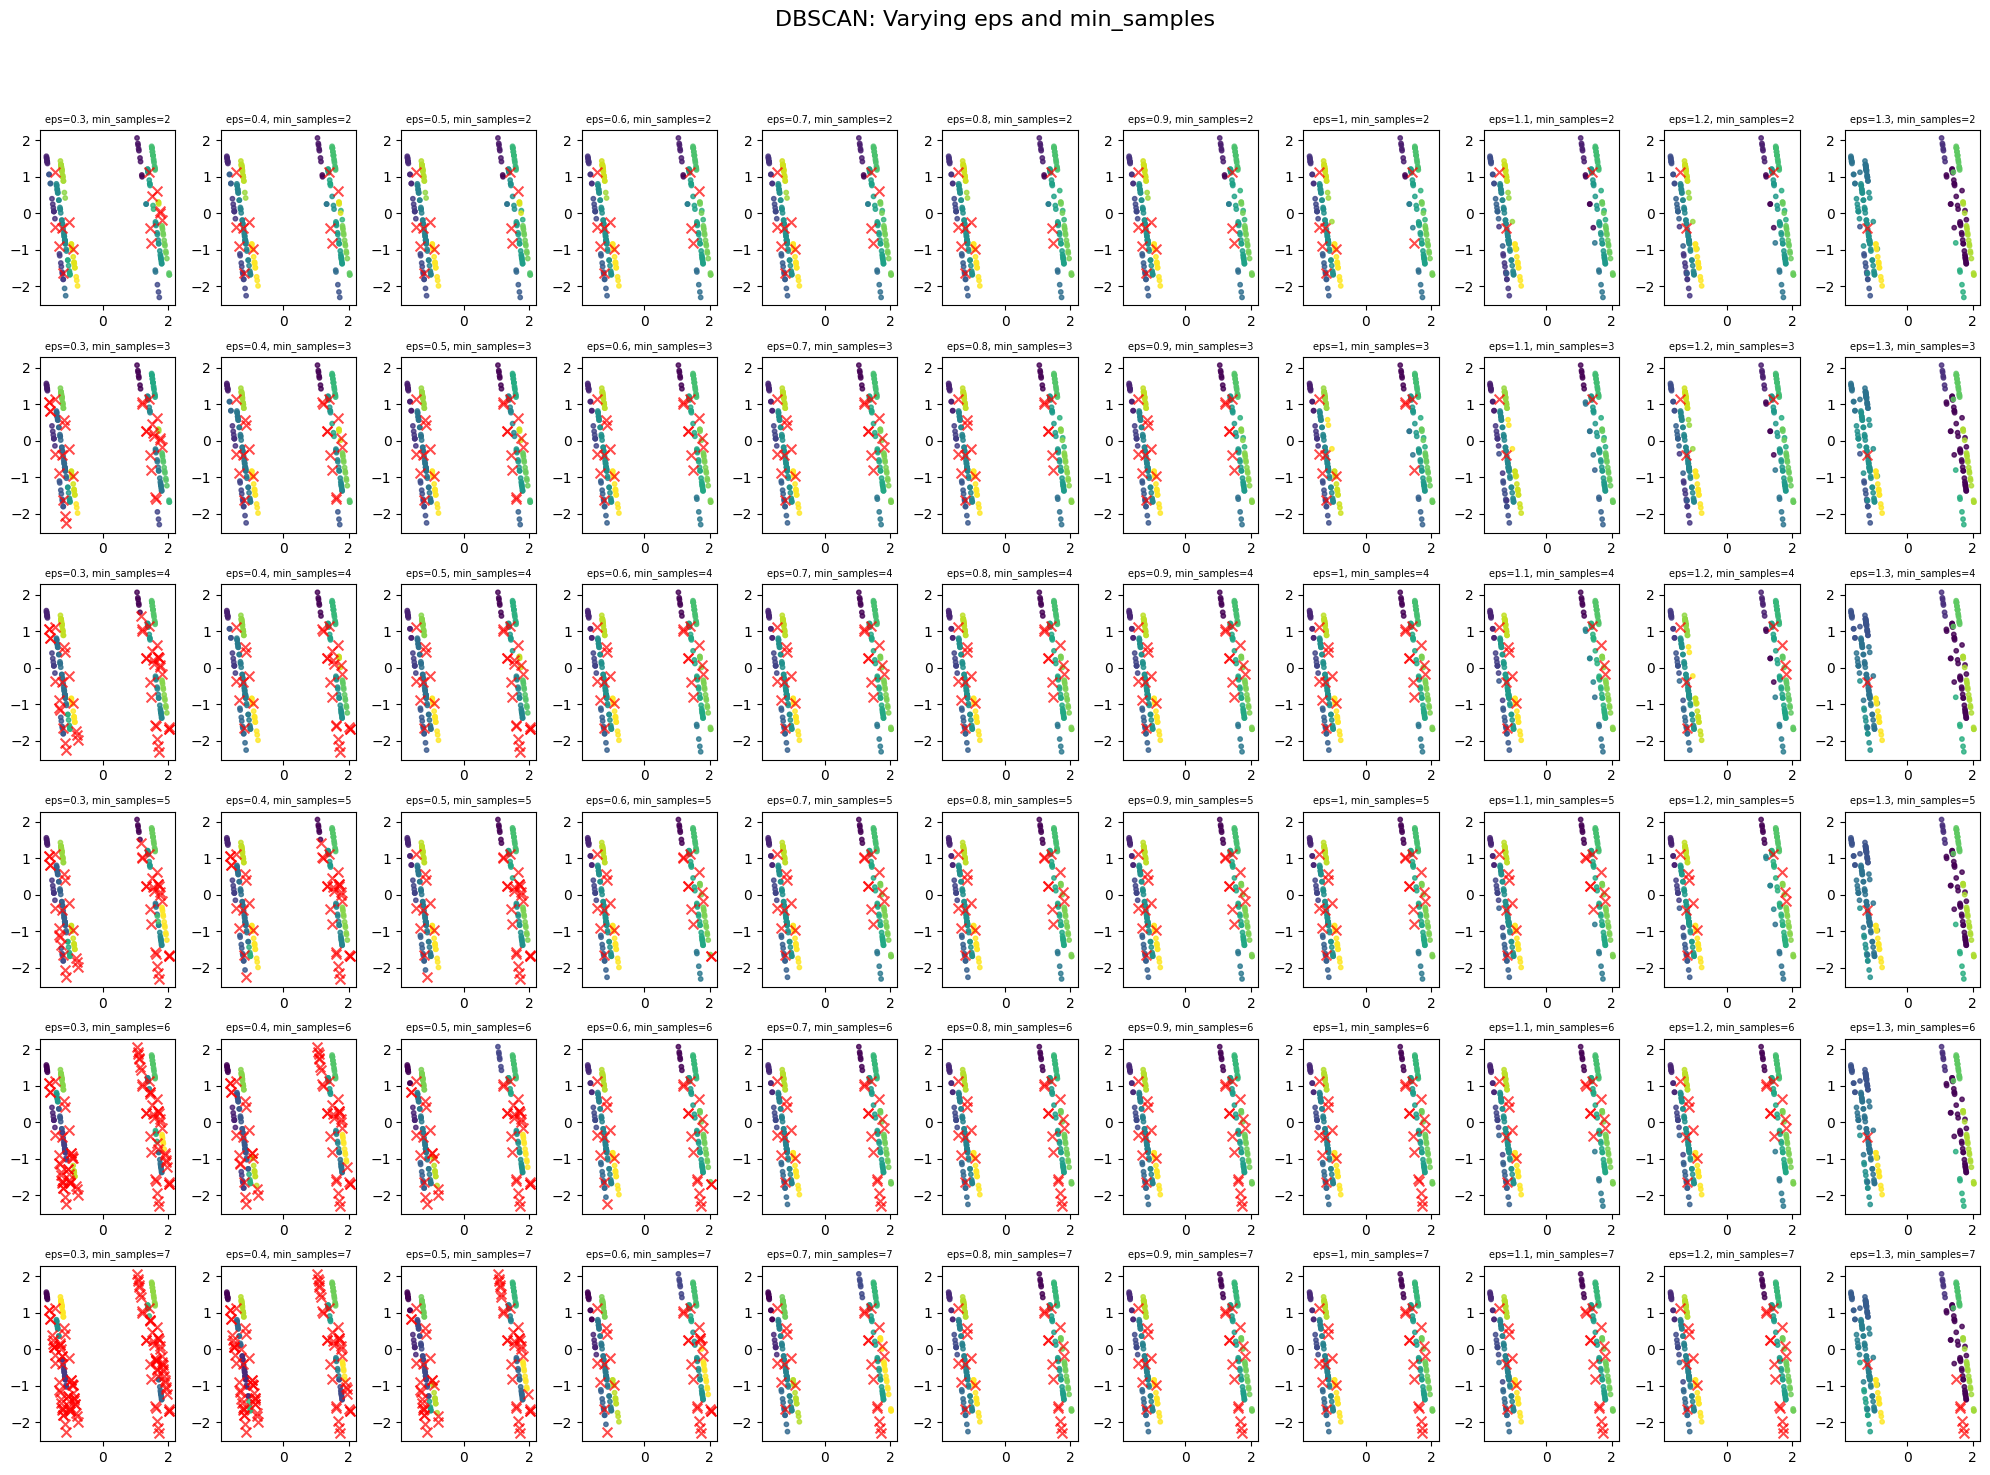

In [117]:
scores={}
noise_percent={}
eps_values = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3]
min_samples_values = [2,3,4,5,6,7]

fig, axs = plt.subplots(len(min_samples_values), len(eps_values), figsize=(20, 15))
fig.suptitle("DBSCAN: Varying eps and min_samples", fontsize=16)

for i, min_samples in enumerate(min_samples_values):
    for j, eps in enumerate(eps_values):
        ax = axs[i, j]
        db = DBSCAN(eps=eps, min_samples=min_samples)
        y = db.fit_predict(X_train_pca)

        noise = y == -1
        clusters = y != -1
        n_clusters = len(set(y)) - (1 if -1 in y else 0)
        if n_clusters >= 2:
         score= silhouette_score(X_train_pca,y)
         scores[(eps,min_samples)]=score
        else:

         scores[(eps, min_samples)] = -1

        n_noise=list(y).count(-1)
        n_clusters= len(set(y))-(1 if -1 in y else 0)
        noise_percent[(eps,min_samples)]=(100 * n_noise / len(y))


        ax.scatter(X_train_pca[clusters, 0], X_train_pca[clusters, 1], c=y[clusters], s=10,alpha=0.8)
        ax.scatter(X_train_pca[noise, 0], X_train_pca[noise, 1], c='red', marker='x', s=50,alpha=0.7)
        ax.set_title(f"eps={eps}, min_samples={min_samples}", fontsize = 7)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [118]:
best_param=max(scores, key=scores.get)
best_score=scores[best_param]
ns=min(noise_percent,key=noise_percent.get)
print(f"Best parameters: eps={best_param[0]}, min_samples={best_param[1]}")
print(f"Best Silhouette Score: {best_score}")
print(f"Noise Percentage: {noise_percent[ns]}")
print(ns[0])
print(ns[1])

Best parameters: eps=0.4, min_samples=2
Best Silhouette Score: 0.5324576766174866
Noise Percentage: 0.5
1.3
2


In [119]:
print(noise_percent)


{(0.3, 2): 7.5, (0.4, 2): 5.5, (0.5, 2): 5.5, (0.6, 2): 5.5, (0.7, 2): 5.5, (0.8, 2): 5.0, (0.9, 2): 5.0, (1, 2): 4.0, (1.1, 2): 1.5, (1.2, 2): 1.5, (1.3, 2): 0.5, (0.3, 3): 15.5, (0.4, 3): 10.5, (0.5, 3): 10.5, (0.6, 3): 9.5, (0.7, 3): 9.5, (0.8, 3): 8.0, (0.9, 3): 8.0, (1, 3): 5.0, (1.1, 3): 1.5, (1.2, 3): 1.5, (1.3, 3): 0.5, (0.3, 4): 23.0, (0.4, 4): 15.0, (0.5, 4): 14.5, (0.6, 4): 9.5, (0.7, 4): 9.5, (0.8, 4): 9.5, (0.9, 4): 9.5, (1, 4): 9.5, (1.1, 4): 5.5, (1.2, 4): 3.5, (1.3, 4): 0.5, (0.3, 5): 23.5, (0.4, 5): 20.0, (0.5, 5): 17.0, (0.6, 5): 10.5, (0.7, 5): 9.5, (0.8, 5): 9.5, (0.9, 5): 9.5, (1, 5): 9.5, (1.1, 5): 8.0, (1.2, 5): 5.5, (1.3, 5): 0.5, (0.3, 6): 39.5, (0.4, 6): 27.0, (0.5, 6): 21.0, (0.6, 6): 13.5, (0.7, 6): 12.0, (0.8, 6): 12.0, (0.9, 6): 12.0, (1, 6): 12.0, (1.1, 6): 8.0, (1.2, 6): 8.0, (1.3, 6): 0.5, (0.3, 7): 55.0, (0.4, 7): 40.0, (0.5, 7): 29.0, (0.6, 7): 15.5, (0.7, 7): 12.0, (0.8, 7): 12.0, (0.9, 7): 12.0, (1, 7): 12.0, (1.1, 7): 11.0, (1.2, 7): 11.0, (1.3, 7)

In [120]:
print(scores)

{(0.3, 2): np.float64(0.5036719701091272), (0.4, 2): np.float64(0.5324576766174866), (0.5, 2): np.float64(0.5300594755838479), (0.6, 2): np.float64(0.42095900789067353), (0.7, 2): np.float64(0.42095900789067353), (0.8, 2): np.float64(0.4299334388925054), (0.9, 2): np.float64(0.4299334388925054), (1, 2): np.float64(0.4346347964933389), (1.1, 2): np.float64(0.4464245180365464), (1.2, 2): np.float64(0.4464245180365464), (1.3, 2): np.float64(0.36707985601720167), (0.3, 3): np.float64(0.45085705635198564), (0.4, 3): np.float64(0.48644716672548166), (0.5, 3): np.float64(0.49979228700286316), (0.6, 3): np.float64(0.44739339781665), (0.7, 3): np.float64(0.44739339781665), (0.8, 3): np.float64(0.4240198858354127), (0.9, 3): np.float64(0.4240198858354127), (1, 3): np.float64(0.4357466440776892), (1.1, 3): np.float64(0.4464245180365464), (1.2, 3): np.float64(0.4464245180365464), (1.3, 3): np.float64(0.36707985601720167), (0.3, 4): np.float64(0.3865517646624565), (0.4, 4): np.float64(0.47791998322

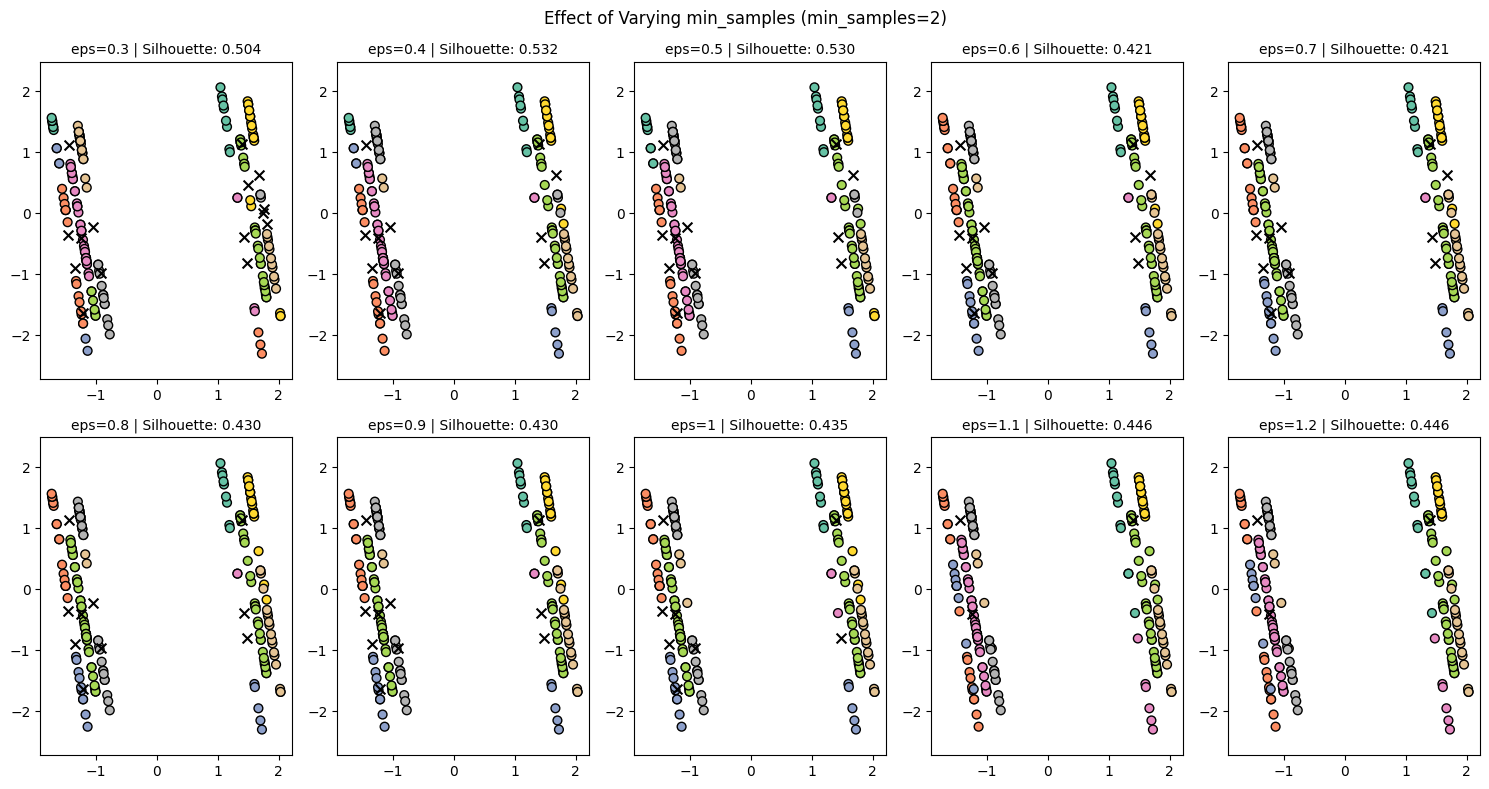

In [121]:
eps_values_1 = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2]
silhouette_scores = []
plt.figure(figsize=(15, 8))
for i, eps in enumerate(eps_values_1):
    y = DBSCAN(eps=eps, min_samples=2).fit_predict(X_train_pca)
    noise = y == -1
    clusters = y != -1
    if len(set(y)) > 1:
        score = silhouette_score(X_train_pca, y)
    else:
        score = -1

    plt.subplot(2, 5, i + 1)
    plt.scatter(X_train_pca[clusters, 0], X_train_pca[clusters, 1], c=y[clusters], cmap='Set2', s=40, edgecolor='k')
    plt.scatter(X_train_pca[noise, 0], X_train_pca[noise, 1], c='black', marker='x', s=50)
    plt.title(f"eps={eps} | Silhouette: {score:.3f}",fontsize=10)
    plt.axis('equal')

plt.suptitle("Effect of Varying min_samples (min_samples=2)")
plt.tight_layout()
plt.show()

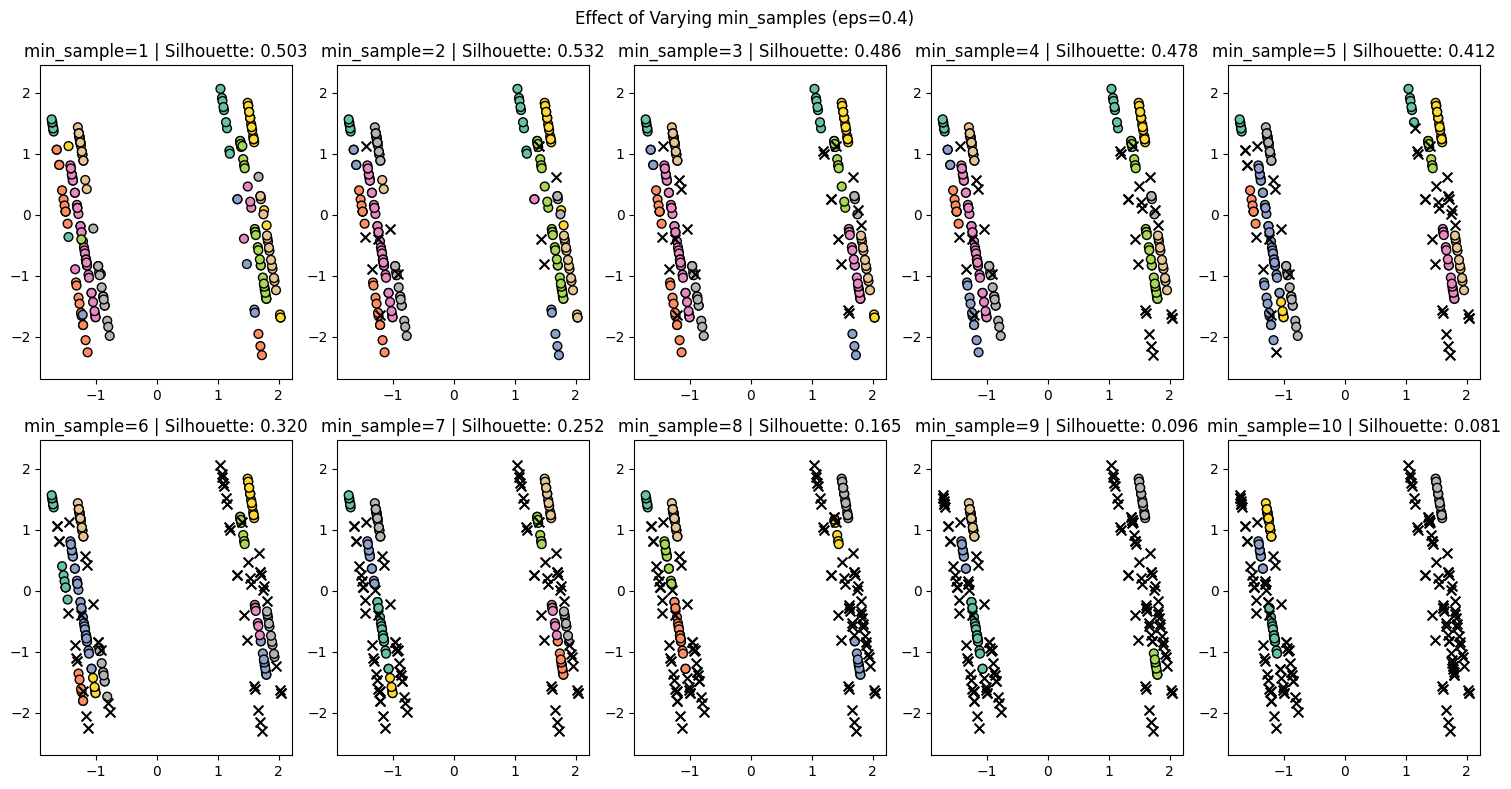

In [122]:

min_samples_values = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(15, 8))
for i, ms in enumerate(min_samples_values):
    y = DBSCAN(eps=0.4, min_samples=ms).fit_predict(X_train_pca)
    noise = y == -1
    clusters = y != -1
    if len(set(y)) > 1:
        score = silhouette_score(X_train_pca, y)
    else:
        score = -1

    plt.subplot(2, 5, i + 1)
    plt.scatter(X_train_pca[clusters, 0], X_train_pca[clusters, 1], c=y[clusters], cmap='Set2', s=40, edgecolor='k')
    plt.scatter(X_train_pca[noise, 0], X_train_pca[noise, 1], c='black', marker='x', s=50)
    plt.title(f"min_sample={ms} | Silhouette: {score:.3f}")
    plt.axis('equal')

plt.suptitle("Effect of Varying min_samples (eps=0.4)")
plt.tight_layout()
plt.show()

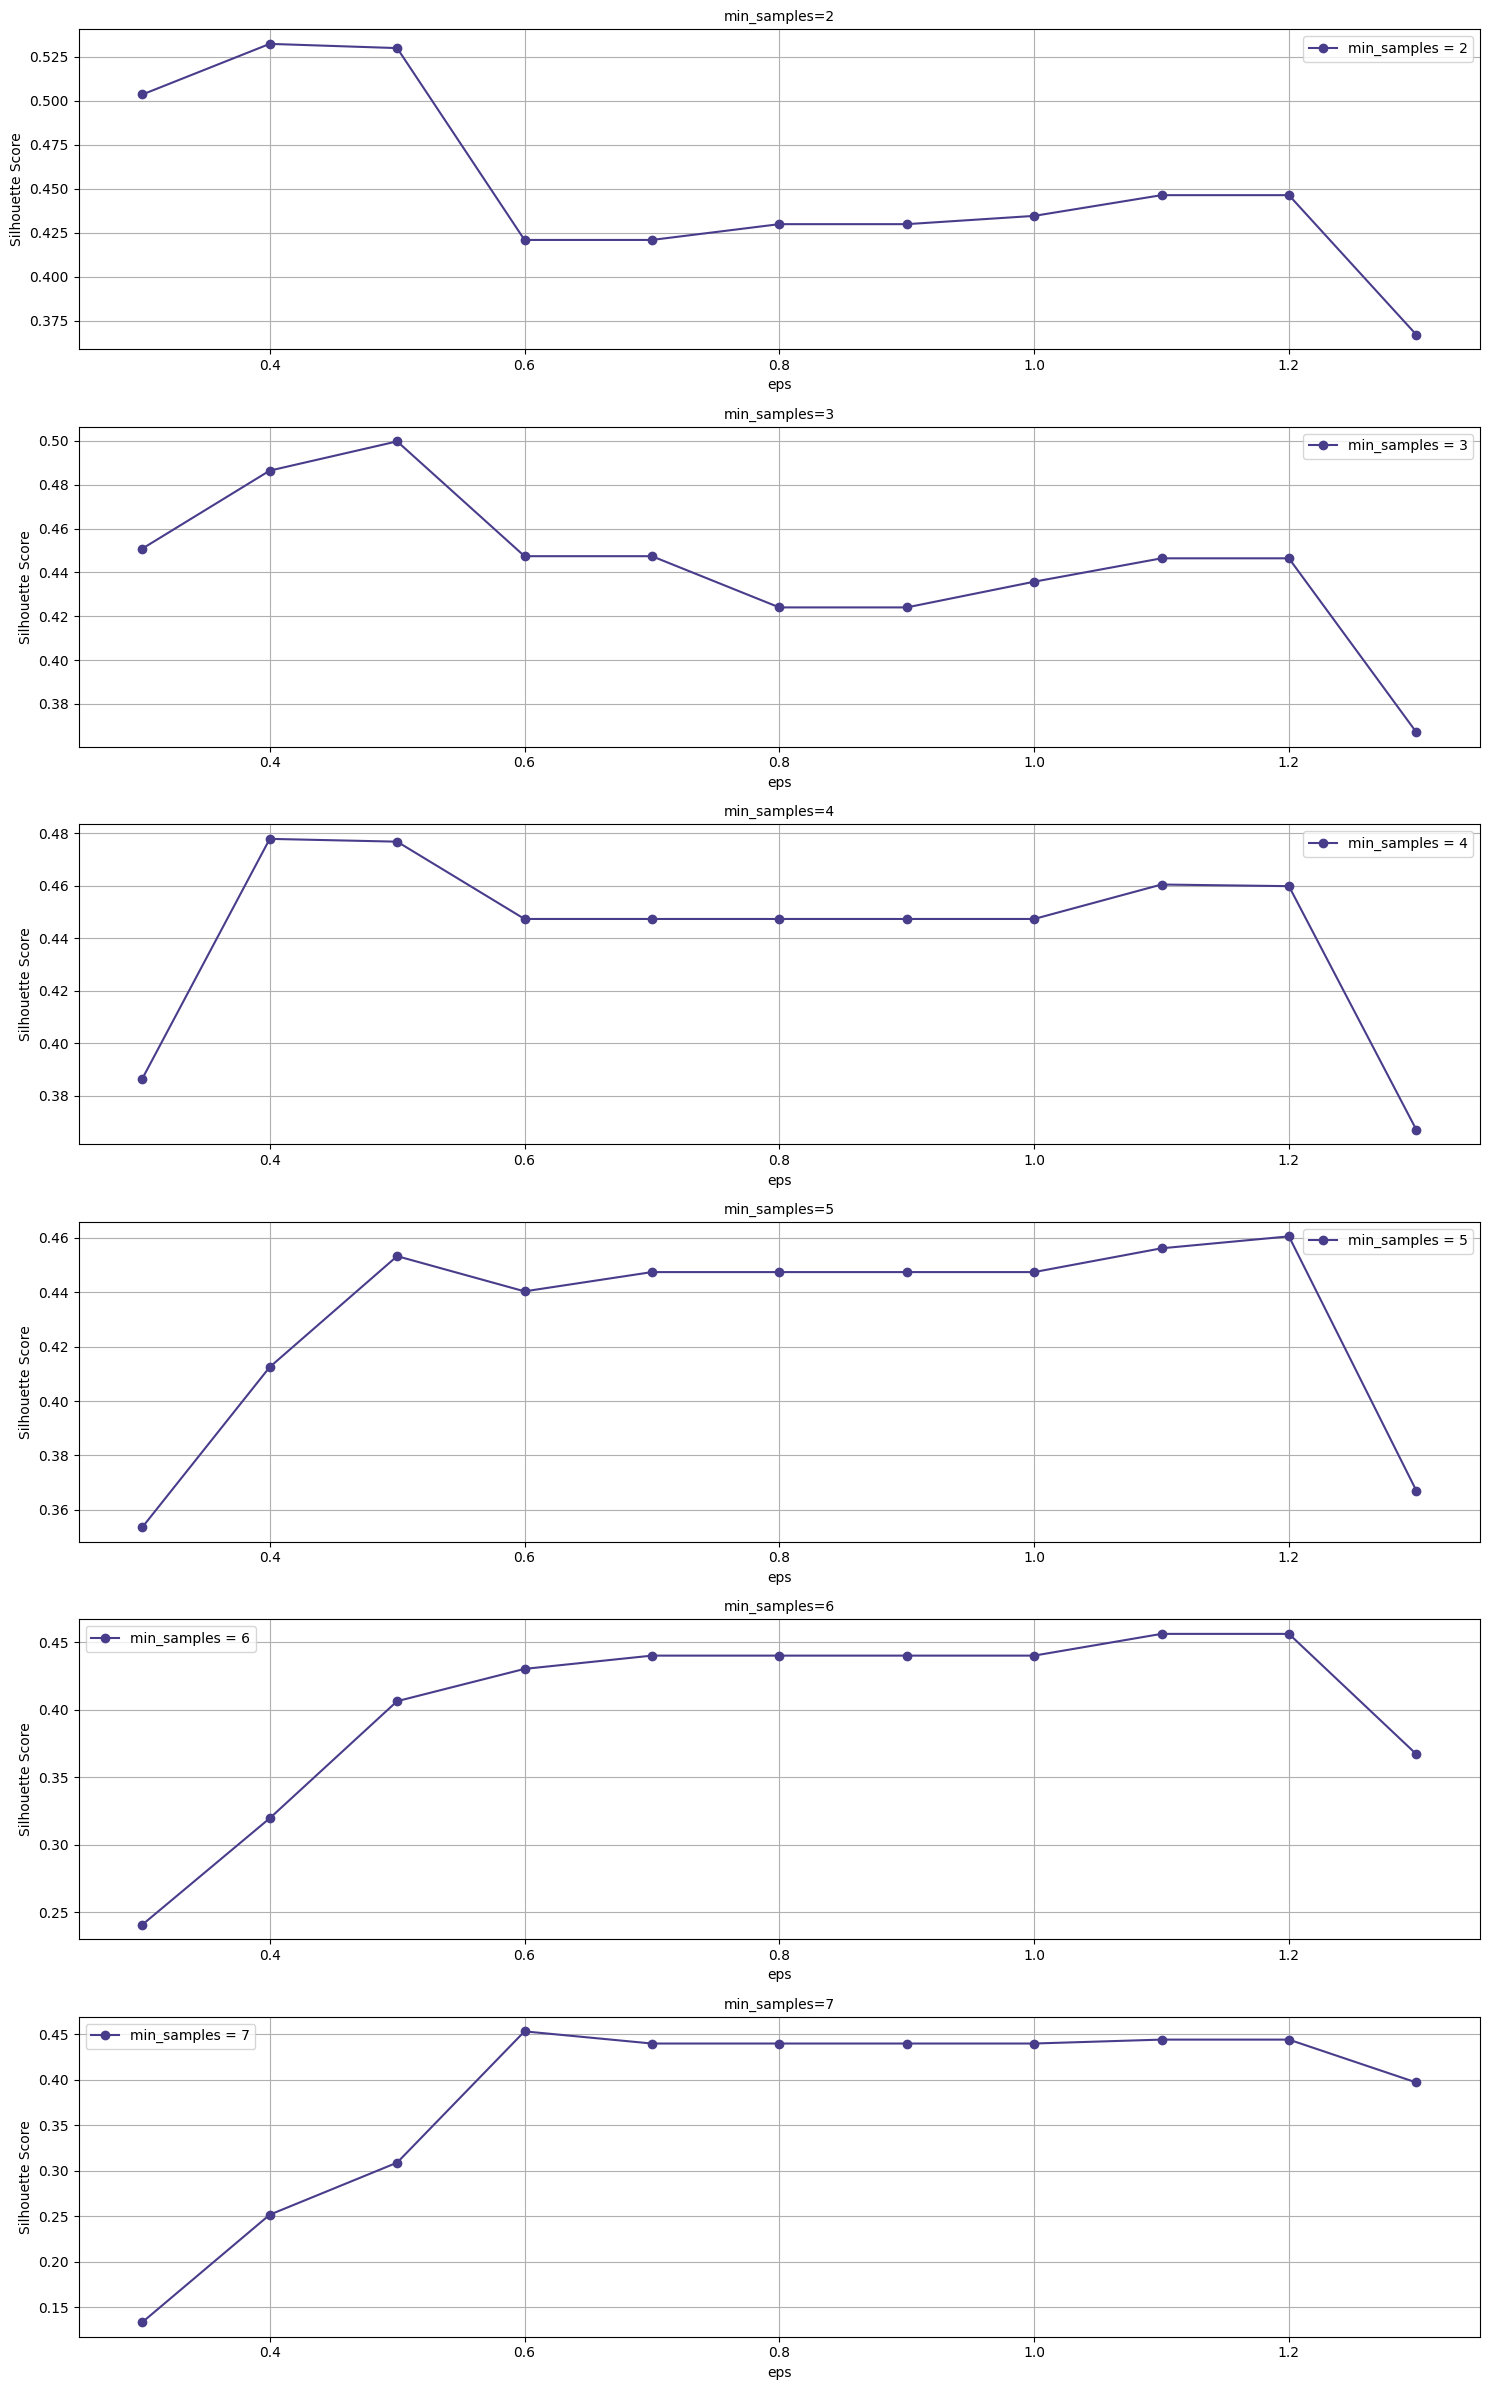

In [123]:
eps_values = [0.4,0.5,0.6,0.7,0.8,0.9]
min_samples_values = [2,3,4,5,6,7]


plt.figure(figsize=(15,4*len(min_samples_values)))
for i , min_samples in enumerate(min_samples_values, 1):
  eps_values=sorted(k[0] for k in scores.keys() if k[1]==min_samples)
  scores_for_min_samples = [scores[(eps, min_samples)] for eps in eps_values]
  plt.subplot(len(min_samples_values),1,i)
  plt.plot(eps_values,scores_for_min_samples,marker='o',color='#483D8B',label=f'min_samples = {min_samples}')
  plt.grid()
  plt.xlabel("eps")
  plt.ylabel("Silhouette Score")
  plt.legend()
  plt.title(f"min_samples={min_samples}",fontsize=10)
plt.tight_layout()
plt.show()

In [124]:
best_param = max(scores, key=scores.get)
best_score=scores[best_param]
print("Best Parameters:", best_param)
print("Best Score:", best_score)

Best Parameters: (0.4, 2)
Best Score: 0.5324576766174866


we applyed maniual grid search by tisting a range of values for eps and min_samples we used a wide range to cover all poissible cases and the last cell shows the best hyperparameter and the bst silhoutte score

In DBSCAN, noise points are those that do not belong to any cluster — they're considered outliers or anomalies

In [125]:
dbscan_1=DBSCAN(eps=0.4,min_samples=2)
labels=dbscan_1.fit_predict(X_train_pca)

n_noise=list(labels).count(-1)
n_clusters= len(set(labels))-(1 if -1 in labels else 0)
n_clusterss=X_train_pca[dbscan_1.labels_!=-1]
print("Number of clusters found:", n_clusters)
print("Number of Cluster Points: ",len(n_clusterss))
print("Number of Noise Points: ",n_noise)
print("Percentage of noise points: ",(100 * n_noise / len(labels)))

Number of clusters found: 21
Number of Cluster Points:  189
Number of Noise Points:  11
Percentage of noise points:  5.5


**need to update MAJD**

After tuning the DBSCAN parameters, the algorithm successfully identified four cluster along with several noise points. This result aligns with the nature of the dataset, which is expected to contain a single dense group (normal transactions) and scattered outliers (fraud cases).

**DBSCAN detected X noise points — and this shows its strength in separating structure from randomness.**

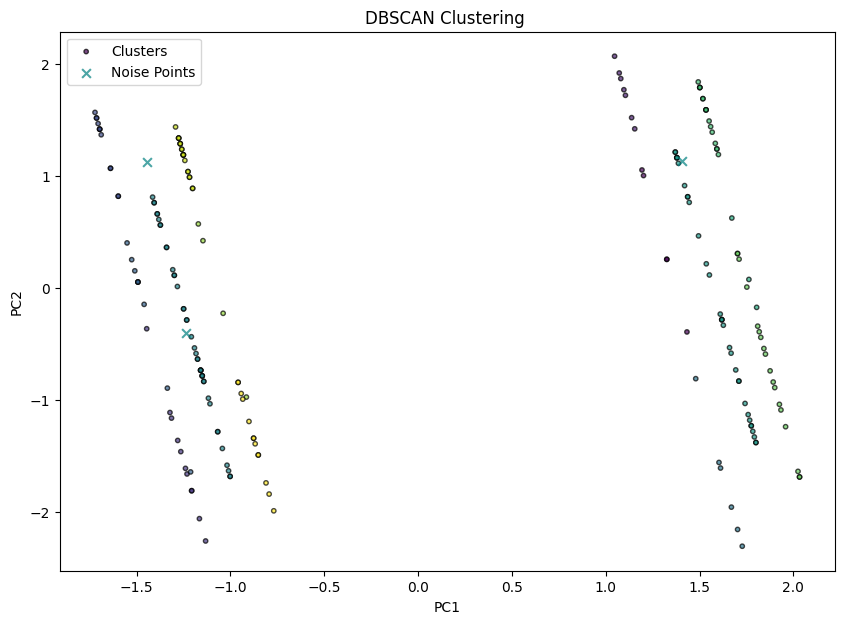

In [128]:
noise_points = X_train_pca[labels == -1]
cluster_points = X_train_pca[labels != -1]

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)


plt.figure(figsize=(10, 7))

plt.scatter(cluster_points[:,0],cluster_points[:,1],c=labels[labels!=-1],s=10,edgecolor='k',alpha=0.7,label='Clusters')

plt.scatter(noise_points[:,0],noise_points[:,1],c='#008080',s=40,alpha=0.7,marker='x',label='Noise Points')

plt.title("DBSCAN Clustering ")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

**How the point classify as an noise point:**

if the point does not have enough neighboring points (min_samples)within a given distance (eps), and it is not within the neighborhood of any core point it classified as noise


After tuning the DBSCAN paramerters , the algorithm successfully identified 21 clusters with 11 noise points

In [132]:
if len(set(labels) - {-1}) > 1:
    score_dbscan_ch= calinski_harabasz_score(X_train_pca, labels)
else:
    score_dbscan_ch= -1

print("Calinski-Harabasz Score - DBSCAN:", score_dbscan_ch)

Calinski-Harabasz Score - DBSCAN: 69.15889524967639


**Calinski-Harabasz Score = "How well your data is grouped."**

In [133]:
Ndf=pd.DataFrame(noise_points)
print("Noise stats:\n", Ndf.describe())

Noise stats:
               0         1         2         3
count  3.000000  3.000000  3.000000  3.000000
mean  -0.424658  0.617829 -0.153647 -0.103439
std    1.589297  0.884422  0.220606  1.483867
min   -1.444955 -0.403413 -0.407761 -1.801388
25%   -1.340245  0.361757 -0.224869 -0.627409
50%   -1.235536  1.126927 -0.041977  0.546571
75%    0.085491  1.128450 -0.026590  0.745536
max    1.406518  1.129973 -0.011203  0.944501


For majd

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.001s...
[t-SNE] Computed neighbors for 200 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 1.084727
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.978996
[t-SNE] KL divergence after 500 iterations: 0.109588


<ipython-input-137-c9fe47b42b2b>:6: UserWarning:


The palette list has fewer values (2) than needed (46) and will cycle, which may produce an uninterpretable plot.



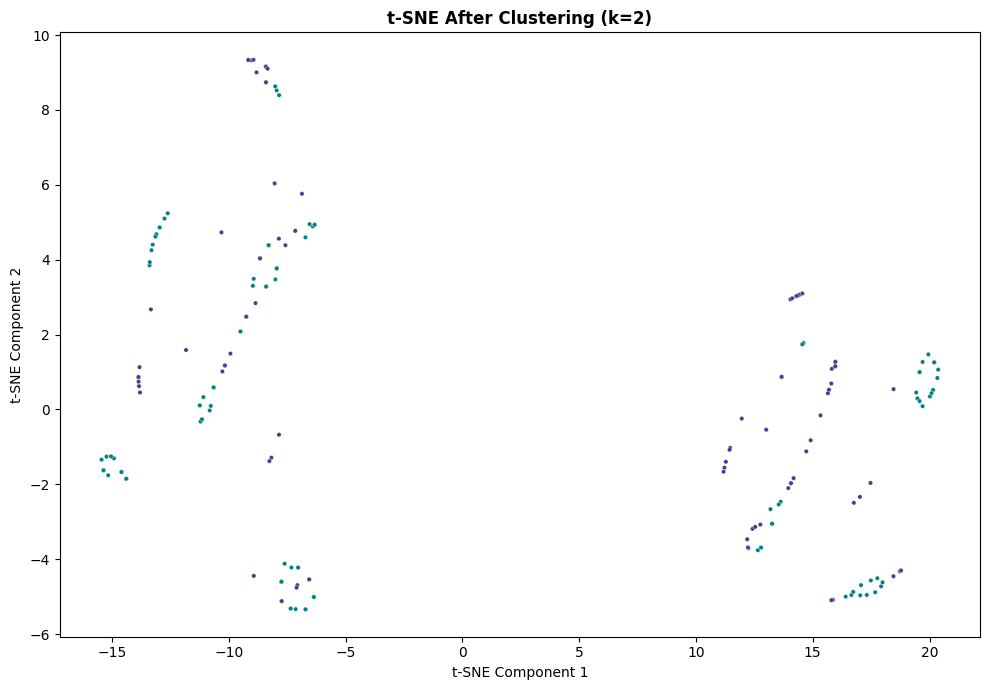

In [137]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=500, verbose=1)
X_train_tsne = tsne.fit_transform(X_train_pca)
db=DBSCAN(eps=0.4, min_samples=2)
y_pred=db.fit_predict(X_train_tsne)
plt.figure(figsize=(10,7))
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=y_pred, palette=['#483D8B','#008080'], s=10, legend=None)
plt.title(f"t-SNE After Clustering (k={2})",  fontweight="bold")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.tight_layout()
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.001s...
[t-SNE] Computed neighbors for 200 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 1.084727
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.978996
[t-SNE] KL divergence after 500 iterations: 0.109588


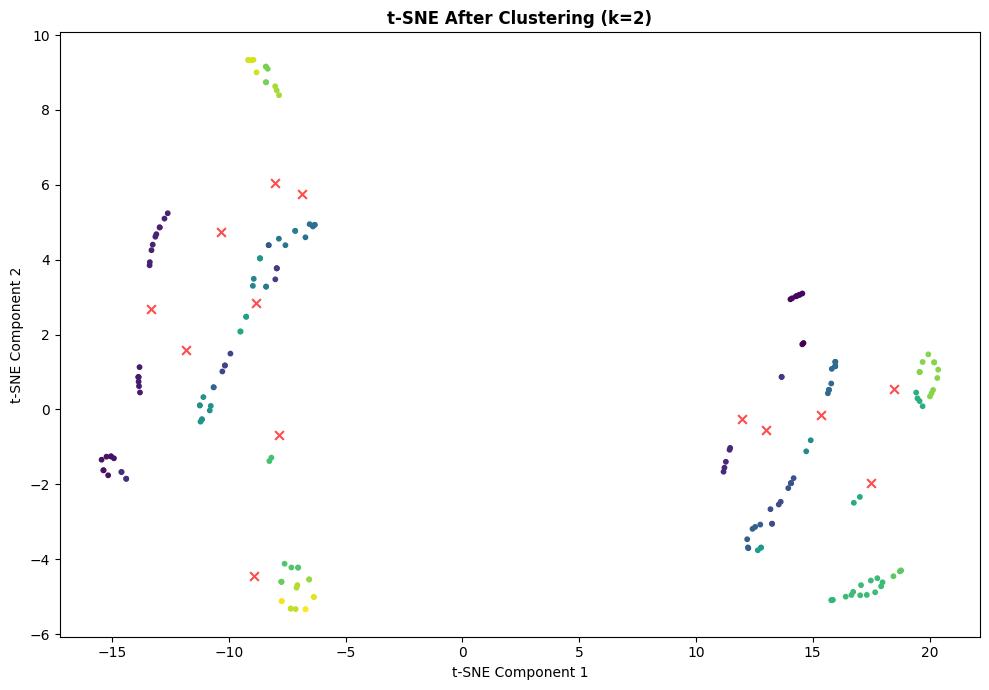

In [136]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=500, verbose=1)
X_train_tsne = tsne.fit_transform(X_train_pca)
db=DBSCAN(eps=0.4, min_samples=2)
y_pred=db.fit_predict(X_train_tsne)
noise_points=X_train_tsne[y_pred==-1]
cluster_points=X_train_tsne[y_pred!=-1]
plt.figure(figsize=(10,7))
plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=y_pred[y_pred!=-1], s=10)
plt.scatter(noise_points[:,0],noise_points[:,1],c='red',s=40,alpha=0.7,marker='x',label='Noise Points')
plt.title(f"t-SNE After DBSCAN Clustering (k={2})",  fontweight="bold")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.tight_layout()
plt.show()

**Compare clustering in full space vs. reduced 2D space.**

In [139]:
dbscan_full=DBSCAN(eps=0.4,min_samples= 2)
y_pred=dbscan_full.fit_predict(X_scaled)
noise_points=X_scaled[y_pred==-1]
cluster_points=X_scaled[y_pred!=-1]
print("Number of Cluster Points: ",len(cluster_points))
print("Number of Clusters ",len(set(y_pred)))
print("Number of Noise Points: ",len(noise_points))

Number of Cluster Points:  189
Number of Clusters  22
Number of Noise Points:  11


Text(0, 0.5, 'Feature 2')

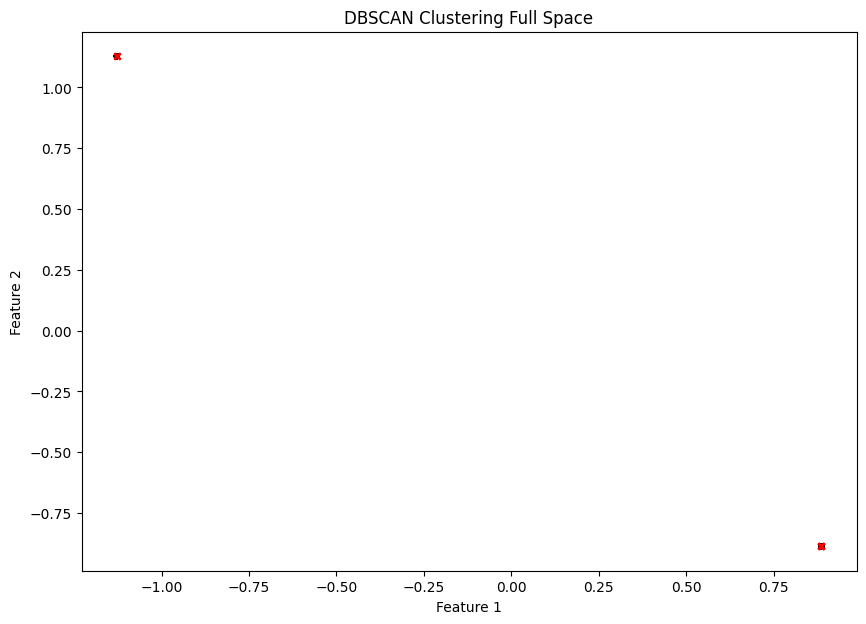

In [143]:
plt.figure(figsize=(10,7))
plt.scatter(cluster_points[:,0],cluster_points[:,1],s=10,label='Cluster points',c=y_pred[y_pred!=-1],edgecolor='k',alpha=0.7)

plt.scatter(noise_points[:,0],noise_points[:,1],marker='x',s=20,color='red',label='Noise points')

plt.title("DBSCAN Clustering Full Space")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [146]:
pca2d=PCA(n_components=2)
X_train_pca2d=pca2d.fit_transform(X_scaled)

db=DBSCAN(eps=0.4,min_samples=2)
y_pred=db.fit_predict(X_train_pca2d)
noise_points=X_train_pca2d[y_pred==-1]
cluster_points=X_train_pca2d[y_pred!=-1]
print("Number of Cluster Points: ",len(cluster_points))
print("Number of Noise Points: ",len(noise_points))
print("Number of Clusters:",len(set(y_pred)))


Number of Cluster Points:  200
Number of Noise Points:  0
Number of Clusters: 2


In [147]:
print(y_pred)

[0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0
 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1
 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1
 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0]


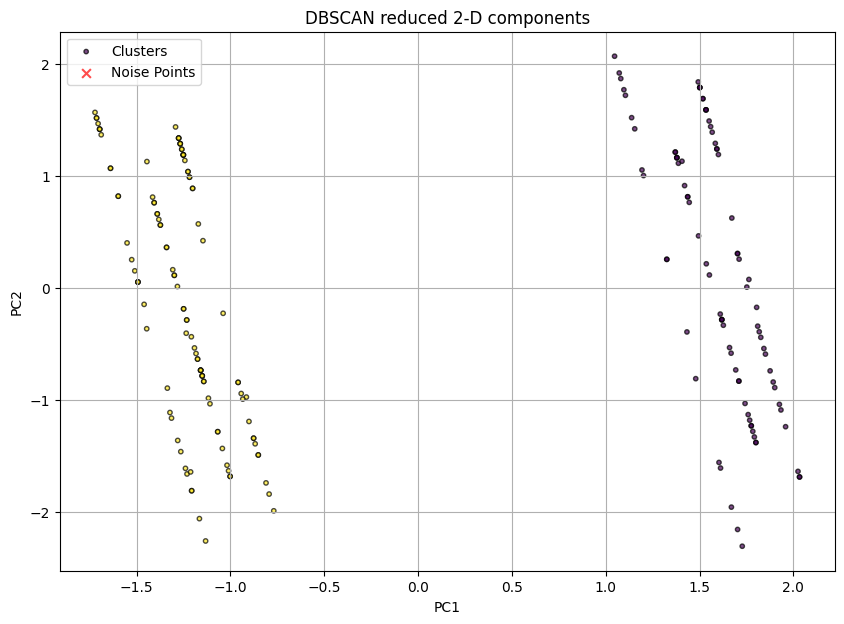

In [150]:
plt.figure(figsize=(10,7))
plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=y_pred[y_pred!=-1], s=10, edgecolor='k',alpha=0.7,label='Clusters')
plt.scatter(noise_points[:,0],noise_points[:,1],c='red',s=40,alpha=0.7,marker='x',label='Noise Points')
plt.title("DBSCAN reduced 2-D components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid()
plt.show()

Plot clusters and compare to K-Means clusters

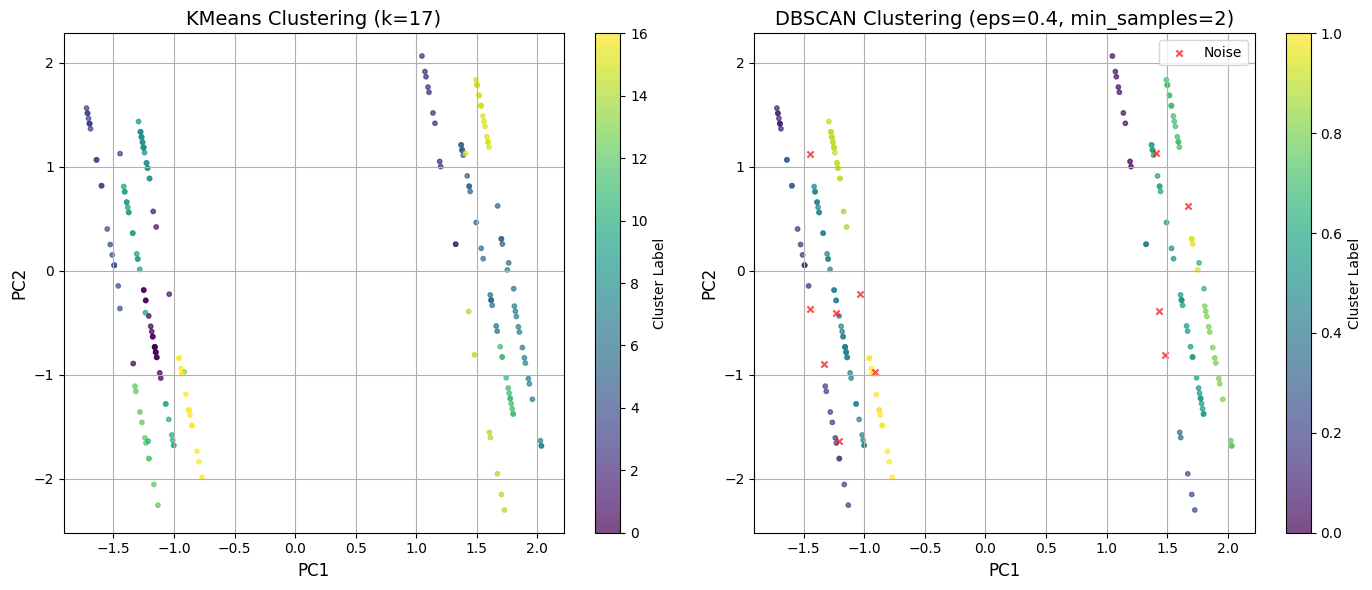

In [158]:
kmeans_best_k = KMeans(n_clusters=best_k_standard, random_state=42, init='random')
kmeans_best_k_labels = kmeans_best_k.fit_predict(X_train_pca)

dbscan_best_params = DBSCAN(eps=0.4, min_samples=2)
dbscan_best_labels = dbscan_best_params.fit_predict(X_train_pca)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans_best_k_labels, cmap='viridis', s=10, alpha=0.7)
plt.title(f'KMeans Clustering (k={best_k_standard})', fontsize=14)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.colorbar(label='Cluster Label')
plt.grid()
plt.subplot(1, 2, 2)
noise_points_dbscan = X_train_pca[dbscan_best_labels == -1]
clustered_points_dbscan = X_train_pca[dbscan_best_labels != -1]
plt.scatter(clustered_points_dbscan[:, 0], clustered_points_dbscan[:, 1], c=dbscan_best_labels[dbscan_best_labels != -1], cmap='viridis', s=10, alpha=0.7)
plt.scatter(noise_points_dbscan[:, 0], noise_points_dbscan[:, 1], c='red', marker='x', s=20, label='Noise', alpha=0.7)

plt.title(f'DBSCAN Clustering (eps=0.4, min_samples=2)', fontsize=14)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.colorbar(label='Cluster Label')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

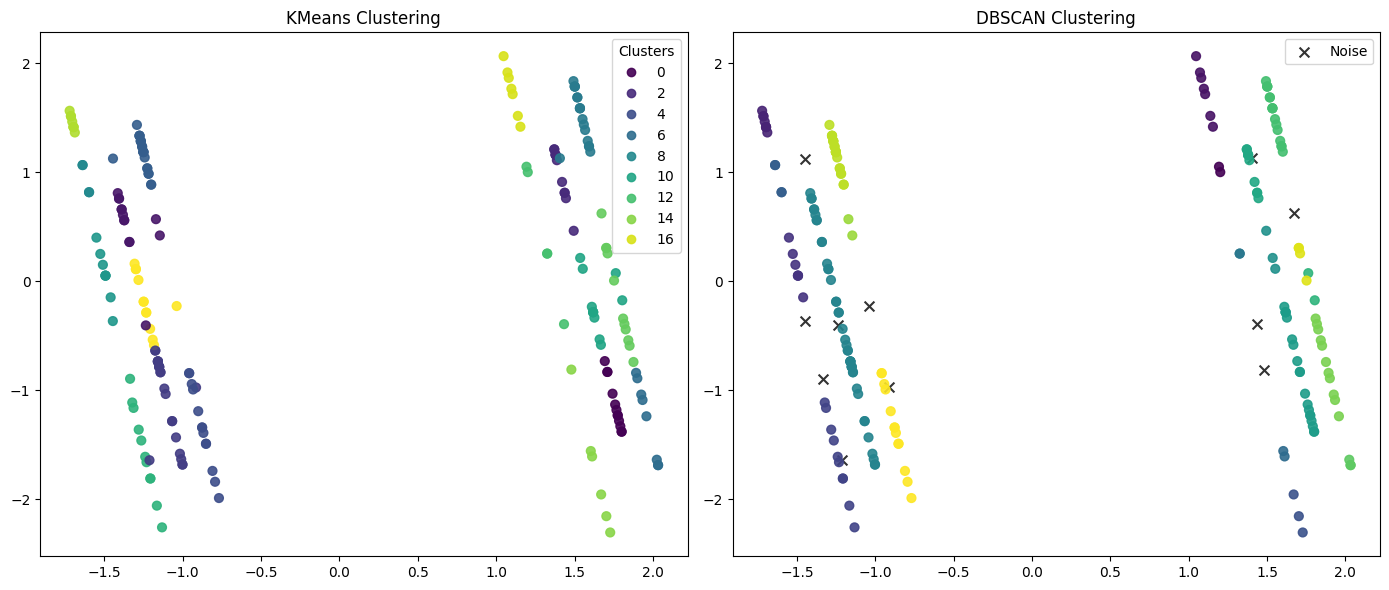

In [153]:
# kmeans = KMeans(n_clusters=best_k_pp, random_state=0)
# y_kmeans = kmeans.fit_predict(X_train_pca)

# dbscan = DBSCAN(eps=0.4, min_samples=2)
# y_dbscan = dbscan.fit_predict(X_train_pca)

# fig, axs = plt.subplots(1, 2, figsize=(14, 6))
# scatter_kmeans = axs[0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_kmeans, cmap=plt.cm.viridis, s=40, alpha=0.9)
# axs[0].set_title("KMeans Clustering")
# axs[0].legend(*scatter_kmeans.legend_elements(), title="Clusters")

# noise_points = X_train_pca[y_dbscan == -1]
# axs[1].scatter(noise_points[:, 0], noise_points[:, 1], color='black', marker='x', s=50, label="Noise", alpha=0.8)

# valid_points = X_train_pca[y_dbscan != -1]
# valid_labels = y_dbscan[y_dbscan != -1]
# scatter_dbscan = axs[1].scatter(valid_points[:, 0], valid_points[:, 1], c=valid_labels, cmap=plt.cm.viridis, s=40, alpha=0.9)

# axs[1].set_title("DBSCAN Clustering")
# axs[1].legend()
# plt.tight_layout()
# plt.show()


In [160]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

evaluations = {'KMeans': {'Silhouette Score': silhouette_score(X_train_pca, kmeans_best_k_labels), 'Davies-Bouldin Index': davies_bouldin_score(X_train_pca, kmeans_best_k_labels), 'Calinski-Harabasz Score':calinski_harabasz_score(X_train_pca, kmeans_best_k_labels),'Number of Clusters':best_k_standard}}


if len(set(labels) - {-1}) > 1:
    evaluations['DBSCAN'] ={
        'Silhouette Score': silhouette_score(X_train_pca[dbscan_best_labels!= -1], dbscan_best_labels[dbscan_best_labels != -1]),
        'Davies-Bouldin Index': davies_bouldin_score(X_train_pca[dbscan_best_labels != -1], dbscan_best_labels[dbscan_best_labels != -1]),
        'Calinski-Harabasz Score': calinski_harabasz_score(X_train_pca[dbscan_best_labels != -1], dbscan_best_labels[dbscan_best_labels != -1]),
        'Number of Clusters':len(set(dbscan_best_labels))
    }
else:
    evaluations['DBSCAN'] = {'Silhouette Score': -1, 'Davies-Bouldin Index': -1, 'Calinski-Harabasz Score': -1}


evaluations=pd.DataFrame(evaluations)
evaluations

KMeans      DBSCAN
Silhouette Score           0.584498    0.595598
Davies-Bouldin Index       0.591200    0.456448
Calinski-Harabasz Score  171.981570  111.252701
Number of Clusters        17.000000   22.000000

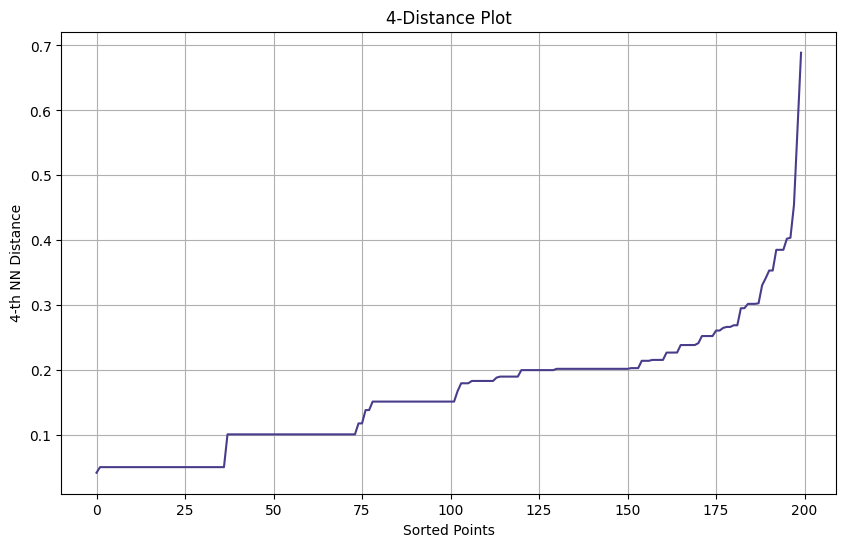

In [161]:
X = X_train_pca[:,:2]
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(X)
distances, indices = neigh.kneighbors(X)
k_distances = np.sort(distances[:, 4])
plt.figure(figsize=(10,6))
plt.plot(k_distances,color='#483D8B')
plt.xlabel("Sorted Points")
plt.ylabel("4-th NN Distance")
plt.title("4-Distance Plot")
plt.grid(True)
plt.show()

هاد المدرج الروماني يا دكتوررررر

by yahya